__Uploading Tensorflow and Keras__

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Project2_training.csv to Project2_training.csv


In [2]:
import keras as keras

__Importing Packages__

In [3]:
import os
os.getcwd()

'/content'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from keras.models import Sequential # https://keras.io/api/models/sequential/

# keras provides layers api to construct the neural network
from keras.layers import Dense, Dropout, Activation, LeakyReLU, ReLU #https://keras.io/api/layers/

from keras import backend
def custom_activation(x):
    return backend.exp(x)

__Reading CSV and Normalizing Variables__

In [6]:
df = pd.read_csv('Project2_training.csv')

In [7]:
# normalize stock and call prices in relation to the option's strike price
df['Stock Price'] = df['Stock Price']/df['Strike Price']
df['Call Price']  = df['Call Price'] /df['Strike Price']

# split data into training and testing sets
n = 3000
n_train =  (int)(0.8 * n)

# select training set and define independent and dependent variable (call price)
train = df[0:n_train]
X_train = train[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_train = train['Call Price'].values

# select testing set and define independent and dependent variable (call price)
test = df[n_train+1:n]
X_test = test[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_test = test['Call Price'].values

In [8]:
df.head()

,Stock Price,Maturity,Dividends,Volatility,Risk-free,Strike Price,Call Price
0,1.467892,1,0,0.992653,0.028574,100,0.747693
1,1.258188,1,0,0.995702,0.026482,100,0.580628
2,0.600640,1,0,0.984955,0.029314,100,0.142689
3,1.082254,1,0,0.048974,0.029928,100,0.111967
4,0.992677,1,0,0.120462,0.020081,100,0.053918


## Part A: Question 1

### Shallow Neural Network

Epoch 1/100
38/38 - 1s - loss: 0.3581 - val_loss: 0.0719 - 1s/epoch - 29ms/step
Epoch 2/100
38/38 - 0s - loss: 0.0577 - val_loss: 0.0523 - 110ms/epoch - 3ms/step
Epoch 3/100
38/38 - 0s - loss: 0.0509 - val_loss: 0.0490 - 102ms/epoch - 3ms/step
Epoch 4/100
38/38 - 0s - loss: 0.0476 - val_loss: 0.0454 - 123ms/epoch - 3ms/step
Epoch 5/100
38/38 - 0s - loss: 0.0436 - val_loss: 0.0408 - 107ms/epoch - 3ms/step
Epoch 6/100
38/38 - 0s - loss: 0.0384 - val_loss: 0.0352 - 114ms/epoch - 3ms/step
Epoch 7/100
38/38 - 0s - loss: 0.0323 - val_loss: 0.0288 - 107ms/epoch - 3ms/step
Epoch 8/100
38/38 - 0s - loss: 0.0257 - val_loss: 0.0222 - 124ms/epoch - 3ms/step
Epoch 9/100
38/38 - 0s - loss: 0.0192 - val_loss: 0.0161 - 107ms/epoch - 3ms/step
Epoch 10/100
38/38 - 0s - loss: 0.0137 - val_loss: 0.0112 - 110ms/epoch - 3ms/step
Epoch 11/100
38/38 - 0s - loss: 0.0094 - val_loss: 0.0077 - 118ms/epoch - 3ms/step
Epoch 12/100
38/38 - 0s - loss: 0.0065 - val_loss: 0.0055 - 109ms/epoch - 3ms/step
Epoch 13/100
38

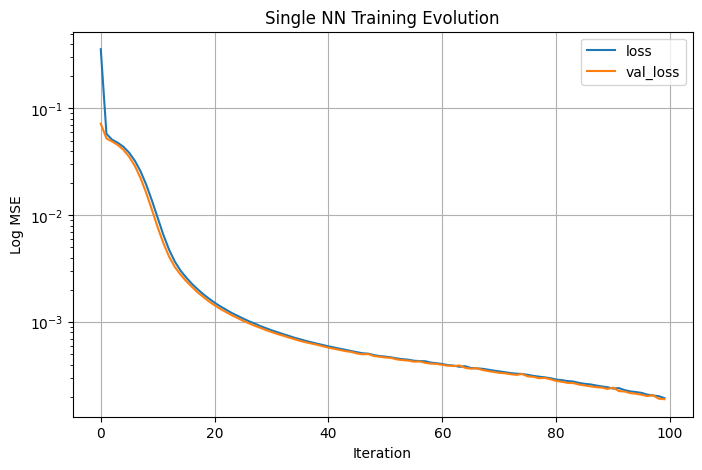

In [9]:
# for this NN we will define it with 300 neurons
nodes = 300
# initialize the mode as Sequential class - the next steps we will add layers to it
model = Sequential()

# to add a layer we call the add method from model (Sequential) and pass as argument the Dense class
# https://keras.io/api/layers/core_layers/dense/
model.add(Dense(nodes, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# since we want to predict a single value we add one additional layer with one neuron
model.add(Dense(1))
# we will use our customized activation function
model.add(Activation(custom_activation))


# https://keras.io/api/models/model_training_apis/

# compile the model
model.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'

# fit the model
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
# print the model parameters
print(model.summary())

# plot the model learning history
pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('Single NN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

__Assessing Accuracy of Shallow Neural Network__

In [10]:
def CheckAccuracy_dict(y, y_hat):
    stats = dict()

    stats['diff'] = y - y_hat

    stats['mse'] = np.mean(stats['diff'] ** 2)
    print(
    "Mean Squared Error:      ", stats['mse'])

    stats['rmse'] = np.sqrt(stats['mse'])
    print(
    "Root Mean Squared Error: ", stats['rmse'])

    stats['mae'] = np.mean(abs(stats['diff']))
    print(
    "Mean Absolute Error:     ", stats['mae'])

    stats['mpe'] = np.sqrt(stats['mse']) / np.mean(y)
    print(
    "Mean Percent Error:      ", stats['mpe'])

    return stats


def CheckAccuracy_plots(y, y_hat):
    stats = dict()

    stats['diff'] = y - y_hat

    # plots
    # mpl.rcParams['agg.path.chunksize'] = 100000
    plt.figure(figsize=(14, 10))
    plt.scatter(y, y_hat, color='black', linewidth=0.3, alpha=0.4, s=0.5)
    plt.xlabel('Actual Price', fontsize=20, fontname='Times New Roman')
    plt.ylabel('Predicted Price', fontsize=20, fontname='Times New Roman')
    plt.show()

    plt.figure(figsize=(14, 10))
    plt.hist(stats['diff'], bins=50, edgecolor='black', color='white')
    plt.xlabel('Diff')
    plt.ylabel('Density')
    plt.show()

19/19 [==============================] - 0s 2ms/step


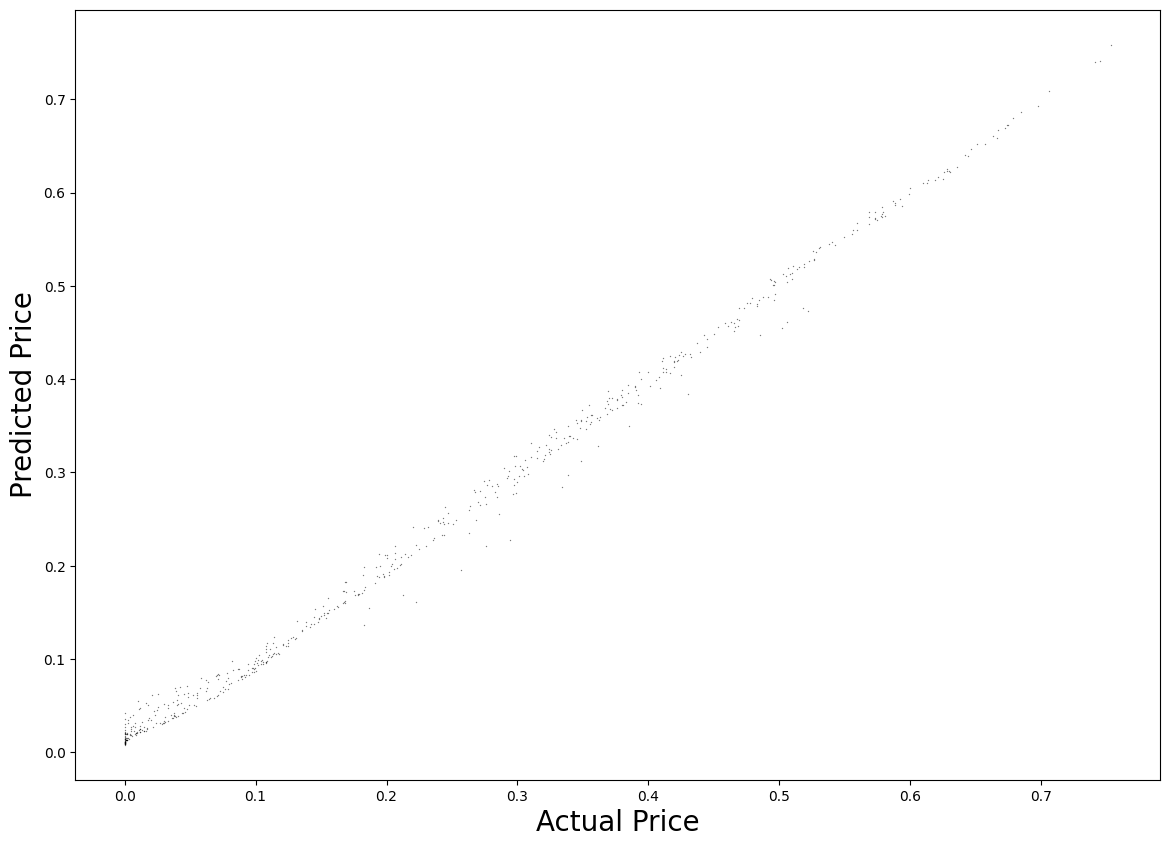

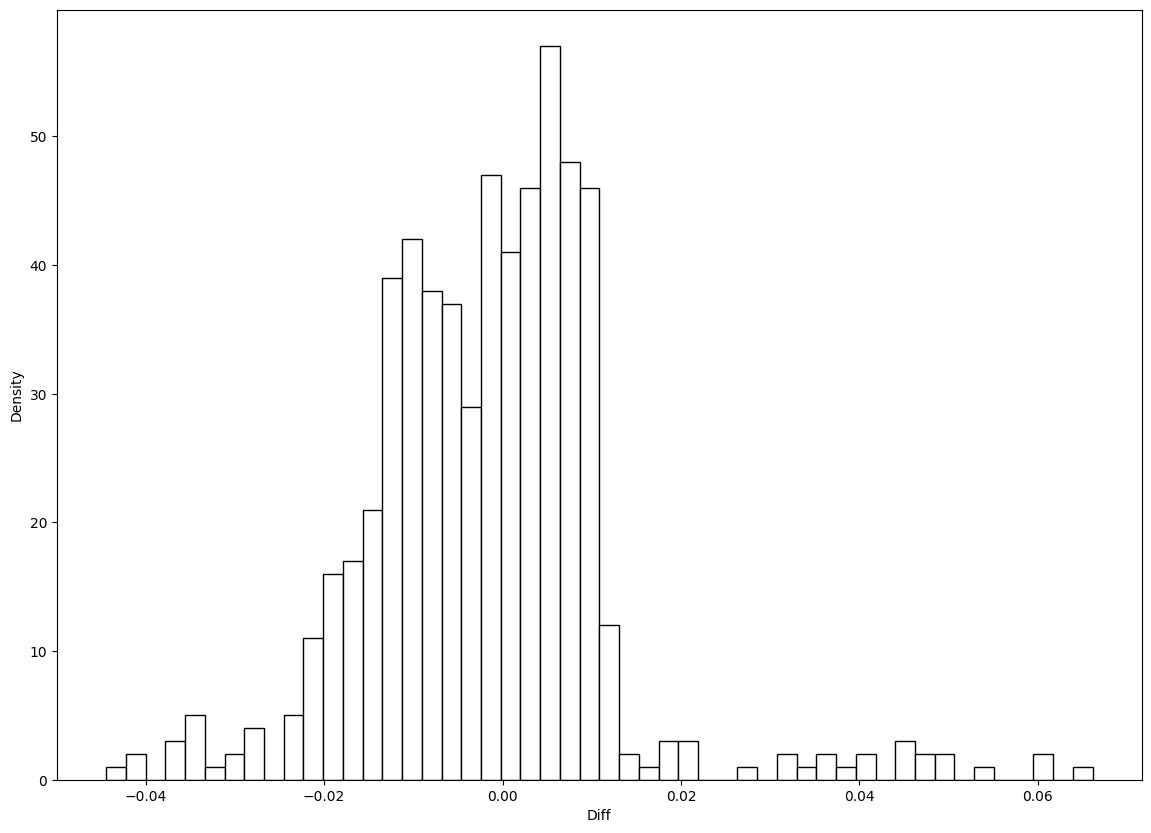

Mean Squared Error:       0.00018950925364163323
Root Mean Squared Error:  0.013766236001232626
Mean Absolute Error:      0.00986947765669031
Mean Percent Error:       0.0569117494813659


In [11]:
y1_test_hat = model.predict(X_test)

y1_test_hat = np.squeeze(y1_test_hat)


CheckAccuracy_plots(y_test, y1_test_hat)
s = CheckAccuracy_dict(y_test, y1_test_hat)


In [12]:
shallow_network = CheckAccuracy_dict(y_test, y1_test_hat)
shallow_network.pop('diff')
shallow_network = {'Shallow Neural Network': shallow_network}

Mean Squared Error:       0.00018950925364163323
Root Mean Squared Error:  0.013766236001232626
Mean Absolute Error:      0.00986947765669031
Mean Percent Error:       0.0569117494813659


### Deep Neural Network

In [13]:
# function for creating neural network structure with different number of layers
def NeuralNetwork(layers, nodes_num, act, opt, epoch_nums):
    # initialize our new model as sequential class
    model = Sequential()

    # add the first layer of nodes_num neurons - for the first layer you must declare the number of features through input_dim arguments
    model.add(Dense(nodes_num, activation= act, input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

    for i in range(layers - 1):
        model.add(Dense(nodes_num, activation = act))

    # output layer is the same as the single NN
    model.add(Dense(1))
    model.add(Activation(custom_activation))

    # compile and fit the model
    model.compile(loss='mse', optimizer=opt) # optimizer = 'rmsprop', 'sgd', 'adam'
    history = model.fit(X_train, y_train, batch_size=512, epochs=epoch_nums, validation_split=0.1, verbose=2,
                              validation_data=(X_test, y_test))
    print()
    print(model.summary())

    pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
    plt.title('DNN Training Evolution')
    plt.ylabel('Log MSE')
    plt.xlabel('Iteration')
    plt.grid(True)

    return model

__Assessing Accuracy of Deep Neural Network (with 3 layers of 100 neurons each)__

Epoch 1/100
5/5 - 2s - loss: 0.3485 - val_loss: 0.1762 - 2s/epoch - 440ms/step
Epoch 2/100
5/5 - 0s - loss: 0.1240 - val_loss: 0.0713 - 53ms/epoch - 11ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0608 - val_loss: 0.0536 - 60ms/epoch - 12ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0549 - val_loss: 0.0555 - 57ms/epoch - 11ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0575 - val_loss: 0.0570 - 67ms/epoch - 13ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0581 - val_loss: 0.0555 - 67ms/epoch - 13ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0555 - val_loss: 0.0517 - 57ms/epoch - 11ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0511 - val_loss: 0.0469 - 54ms/epoch - 11ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0460 - val_loss: 0.0424 - 55ms/epoch - 11ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0413 - val_loss: 0.0382 - 52ms/epoch - 10ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0371 - val_loss: 0.0340 - 71ms/epoch - 14ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0327 - val_loss: 0.0296 - 50ms/epoch - 10ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0281 -

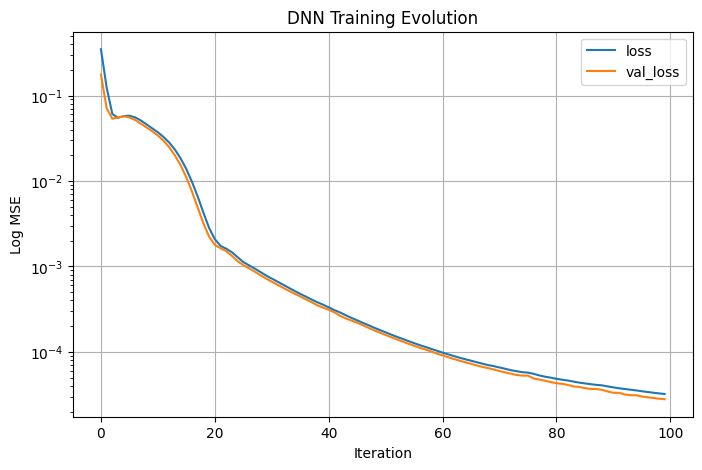

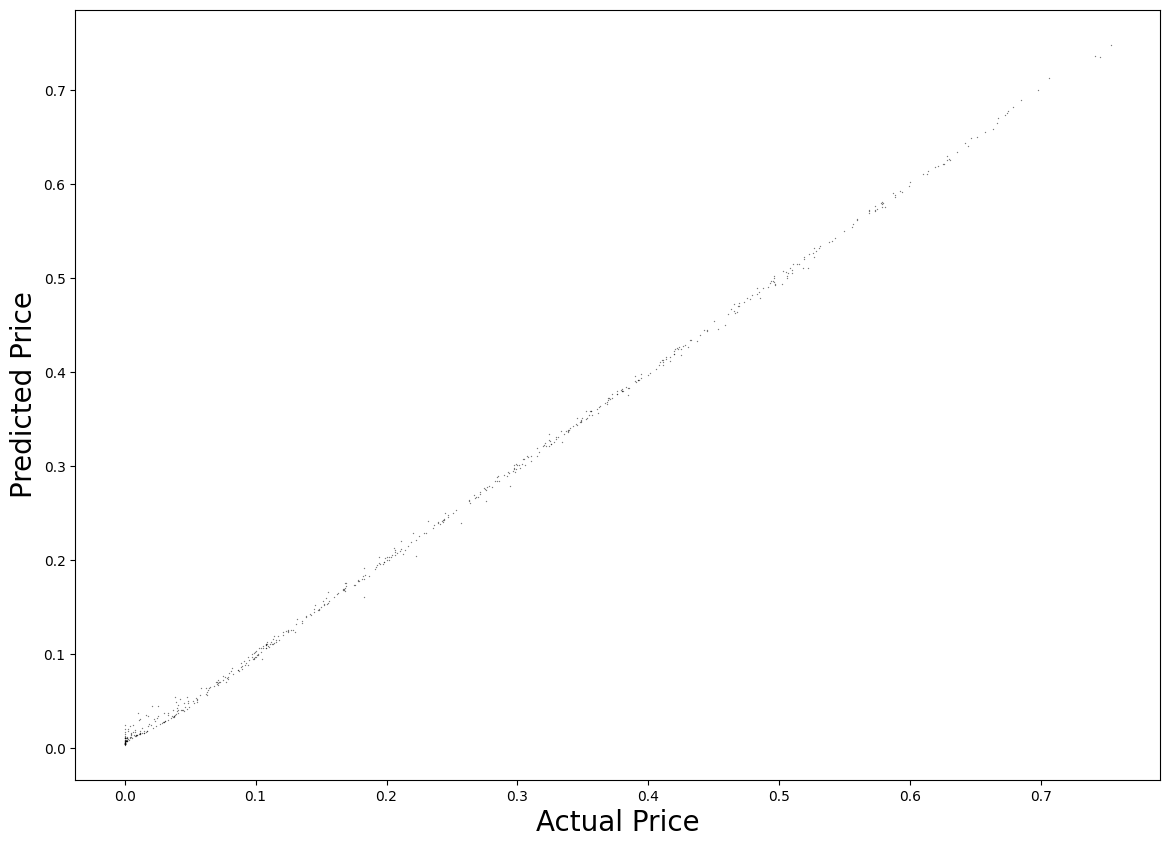

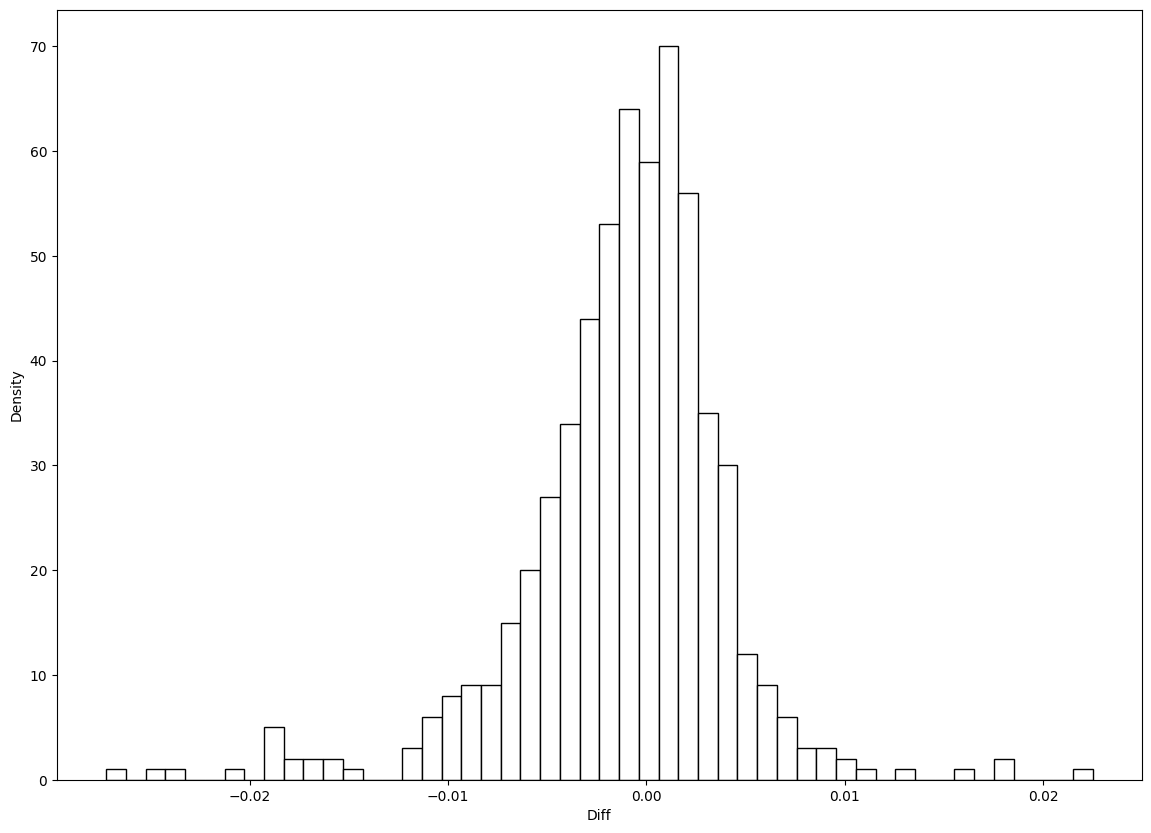

Mean Squared Error:       2.7879388149935447e-05
Root Mean Squared Error:  0.005280093573975318
Mean Absolute Error:      0.0035935086416165247
Mean Percent Error:       0.02182872374796906


In [14]:
y2_test_hat = NeuralNetwork(3, 100, 'relu', 'adam', 100).predict(X_test)

y2_test_hat = np.squeeze(y2_test_hat)

CheckAccuracy_plots(y_test, y2_test_hat)
s = CheckAccuracy_dict(y_test, y2_test_hat)

In [15]:
deep_3_100_relu = CheckAccuracy_dict(y_test, y2_test_hat)
deep_3_100_relu.pop('diff')
deep_3_100_relu = {'DNN (3, 100, Relu)': deep_3_100_relu}

Mean Squared Error:       2.7879388149935447e-05
Root Mean Squared Error:  0.005280093573975318
Mean Absolute Error:      0.0035935086416165247
Mean Percent Error:       0.02182872374796906


### Deep Neural Network (with 5 layers of 60 neurons each)

__Assessing Accuracy of DNN with 5 layers of 60 neurons each__

Epoch 1/100
5/5 - 2s - loss: 0.4004 - val_loss: 0.2394 - 2s/epoch - 317ms/step
Epoch 2/100
5/5 - 0s - loss: 0.1713 - val_loss: 0.0947 - 79ms/epoch - 16ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0712 - val_loss: 0.0523 - 80ms/epoch - 16ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0522 - val_loss: 0.0540 - 81ms/epoch - 16ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0571 - val_loss: 0.0579 - 96ms/epoch - 19ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0592 - val_loss: 0.0560 - 107ms/epoch - 21ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0553 - val_loss: 0.0500 - 96ms/epoch - 19ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0486 - val_loss: 0.0438 - 102ms/epoch - 20ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0427 - val_loss: 0.0389 - 81ms/epoch - 16ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0377 - val_loss: 0.0342 - 82ms/epoch - 16ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0327 - val_loss: 0.0294 - 98ms/epoch - 20ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0281 - val_loss: 0.0249 - 98ms/epoch - 20ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0234

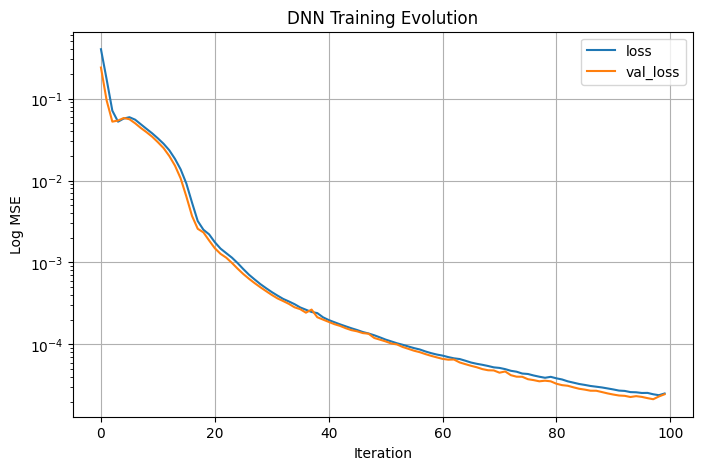

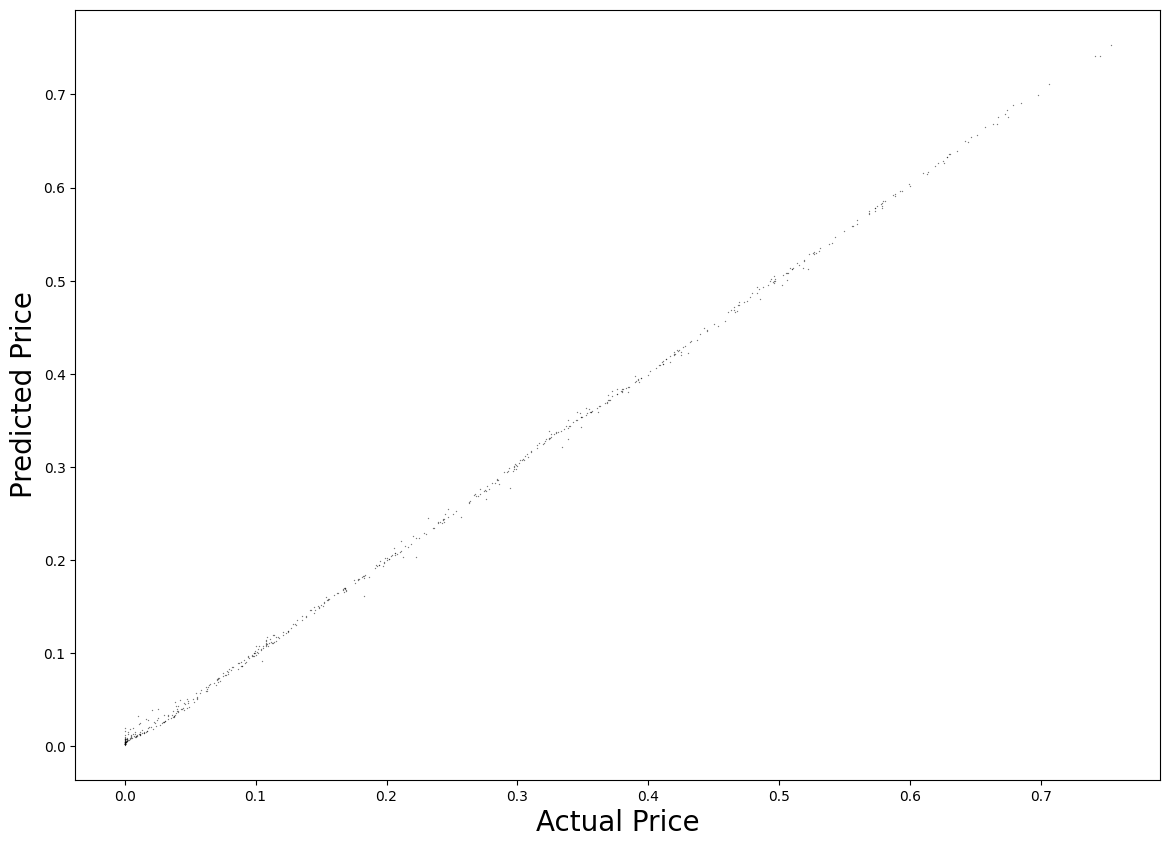

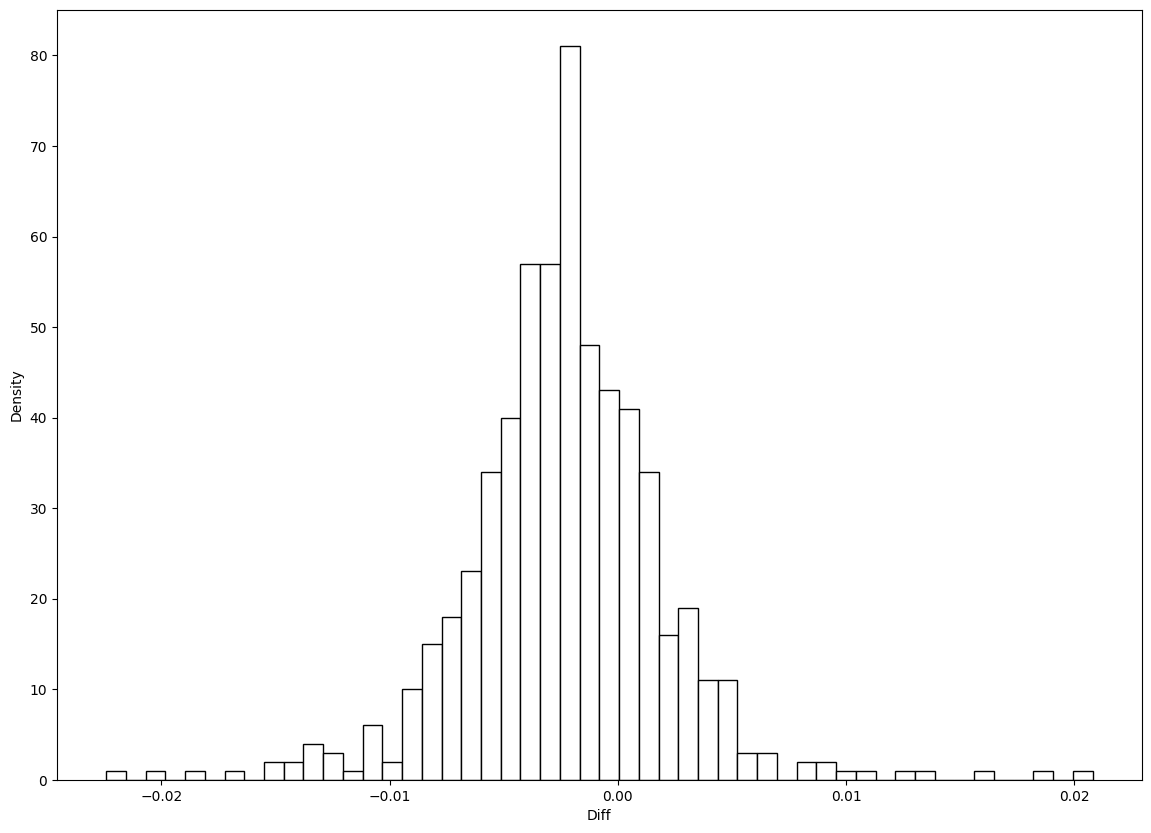

Mean Squared Error:       2.4657522166277127e-05
Root Mean Squared Error:  0.00496563411522407
Mean Absolute Error:      0.0037539477686384143
Mean Percent Error:       0.020528699693689114


{'diff': array([-1.93319381e-03, -9.52280112e-04, -3.47111104e-03,  2.86233835e-03,
        -1.02351389e-02, -2.54448393e-03, -3.47401344e-03, -4.66267797e-03,
        -5.36235898e-03, -5.79032636e-03, -3.38428867e-03, -1.68812679e-03,
        -7.61156084e-03, -2.64430741e-04, -1.82193264e-03, -2.31393520e-03,
        -2.68141798e-03, -3.68304298e-03, -5.73786279e-03, -1.68235981e-03,
         1.42298667e-03,  2.77337267e-03, -6.62068002e-03,  2.35374889e-03,
         4.53581634e-03,  9.01513785e-04,  3.13851688e-03, -3.24607209e-03,
        -6.86687198e-04, -4.48257814e-03,  1.36243886e-04,  2.68260264e-03,
        -1.00366770e-03,  3.34229099e-03, -1.65990611e-03,  3.21434049e-04,
        -3.57063040e-03, -5.94512632e-04, -8.86047289e-03,  3.74222239e-03,
        -3.56181117e-03, -1.57977780e-03, -4.22204191e-04, -2.33408053e-03,
        -3.93467672e-04, -7.78423848e-04, -4.00078810e-03, -2.93740139e-03,
        -6.46516654e-04, -6.27535933e-03, -8.30002380e-03, -6.66966417e-03,
    

In [16]:
y3_test_hat = NeuralNetwork(5, 60, 'relu', 'adam', 100).predict(X_test)

y3_test_hat = np.squeeze(y3_test_hat)

CheckAccuracy_plots(y_test, y3_test_hat)
CheckAccuracy_dict(y_test, y3_test_hat)

In [17]:
deep_5_60_relu = CheckAccuracy_dict(y_test, y3_test_hat)
deep_5_60_relu.pop('diff')
deep_5_60_relu = {'DNN (5, 60, Relu)': deep_5_60_relu}
deep_5_60_relu

Mean Squared Error:       2.4657522166277127e-05
Root Mean Squared Error:  0.00496563411522407
Mean Absolute Error:      0.0037539477686384143
Mean Percent Error:       0.020528699693689114


{'DNN (5, 60, Relu)': {'mse': 2.4657522166277127e-05,
  'rmse': 0.00496563411522407,
  'mae': 0.0037539477686384143,
  'mpe': 0.020528699693689114}}

### Comparison of Key Accuracy Stats Across Neural Networks of Varying Layers

In [18]:
question1 = {**shallow_network, **deep_3_100_relu, **deep_5_60_relu}

df = pd.DataFrame.from_dict(question1)
df

,Shallow Neural Network,"DNN (3, 100, Relu)","DNN (5, 60, Relu)"
mse,0.000190,0.000028,0.000025
rmse,0.013766,0.005280,0.004966
mae,0.009869,0.003594,0.003754
mpe,0.056912,0.021829,0.020529


## Part A: Question 2

### DNN with 5 Layers of 60 Neurons Each (Activation: tanh)

Epoch 1/100
5/5 - 1s - loss: 0.3943 - val_loss: 0.0502 - 1s/epoch - 278ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0519 - val_loss: 0.0572 - 54ms/epoch - 11ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0619 - val_loss: 0.0638 - 74ms/epoch - 15ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0663 - val_loss: 0.0645 - 61ms/epoch - 12ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0654 - val_loss: 0.0615 - 55ms/epoch - 11ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0611 - val_loss: 0.0552 - 54ms/epoch - 11ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0535 - val_loss: 0.0462 - 57ms/epoch - 11ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0433 - val_loss: 0.0365 - 77ms/epoch - 15ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0347 - val_loss: 0.0327 - 58ms/epoch - 12ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0328 - val_loss: 0.0305 - 55ms/epoch - 11ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0278 - val_loss: 0.0233 - 76ms/epoch - 15ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0217 - val_loss: 0.0190 - 54ms/epoch - 11ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0173 -

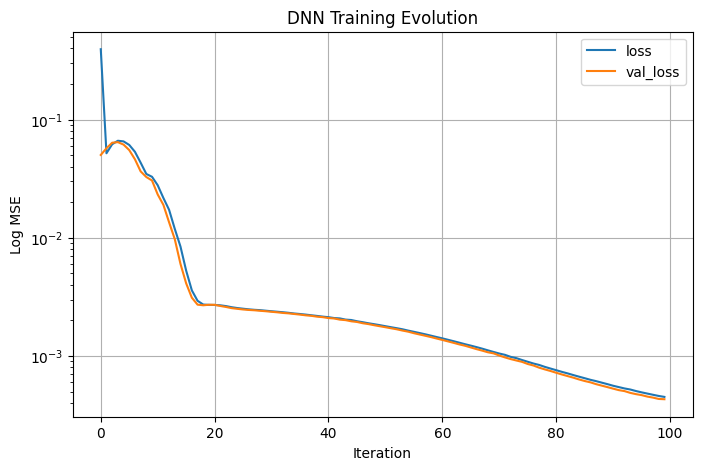

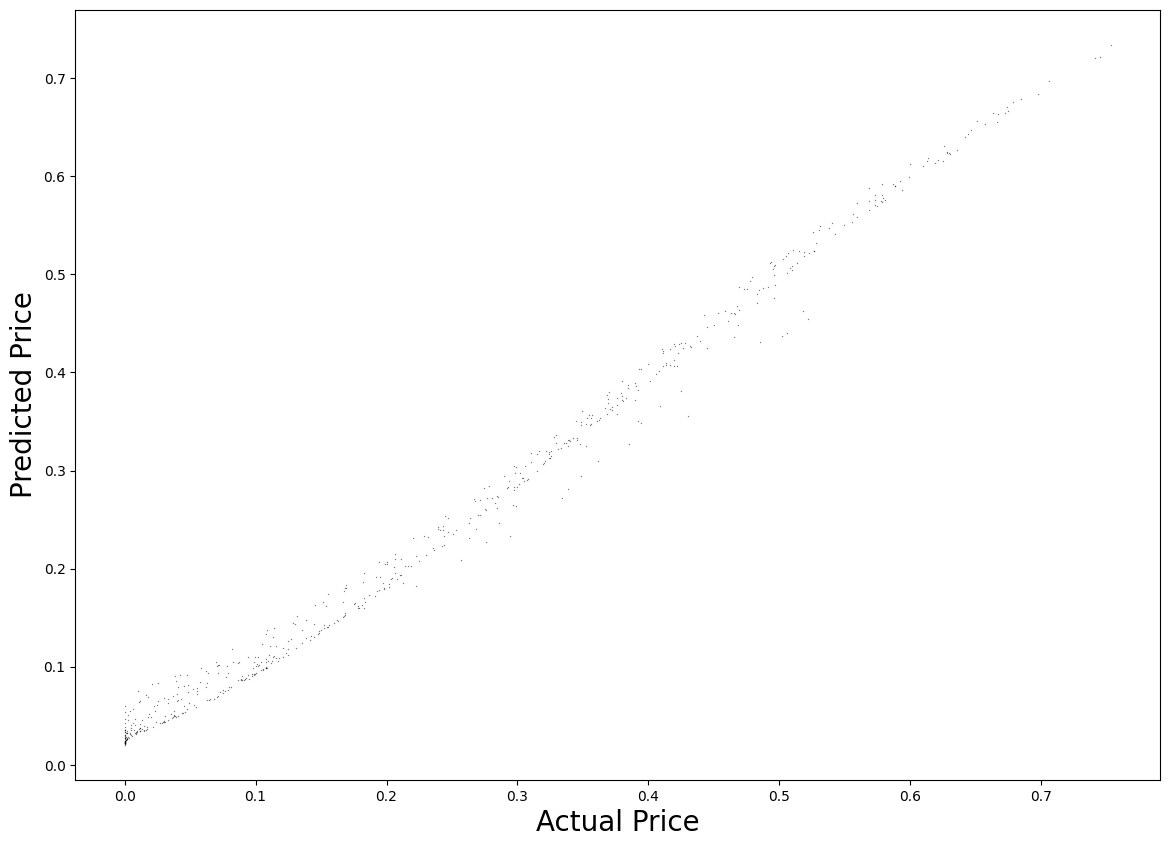

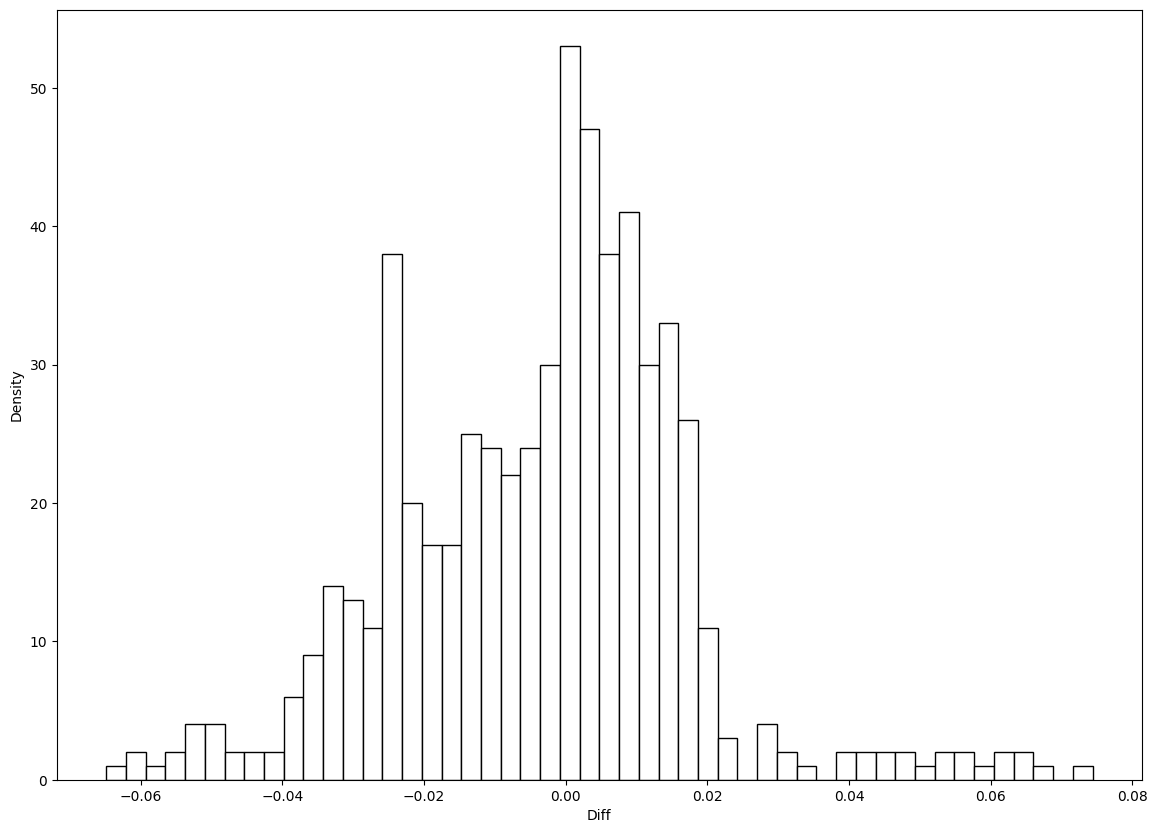

Mean Squared Error:       0.00043041862419455397
Root Mean Squared Error:  0.020746532823451583
Mean Absolute Error:      0.015529759572725614
Mean Percent Error:       0.08576937650563957


In [19]:
y4_test_hat = NeuralNetwork(5, 60, 'tanh', 'adam', 100).predict(X_test)

y4_test_hat = np.squeeze(y4_test_hat)

CheckAccuracy_plots(y_test, y4_test_hat)
s = CheckAccuracy_dict(y_test, y4_test_hat)

In [20]:
deep_5_60_tanh = CheckAccuracy_dict(y_test, y4_test_hat)
deep_5_60_tanh.pop('diff')
deep_5_60_tanh = {'DNN (5, 60, tanh)': deep_5_60_tanh}
deep_5_60_tanh

Mean Squared Error:       0.00043041862419455397
Root Mean Squared Error:  0.020746532823451583
Mean Absolute Error:      0.015529759572725614
Mean Percent Error:       0.08576937650563957


{'DNN (5, 60, tanh)': {'mse': 0.00043041862419455397,
  'rmse': 0.020746532823451583,
  'mae': 0.015529759572725614,
  'mpe': 0.08576937650563957}}

### DNN with 5 Layers of 60 Neurons Each (Activation: sigmoid)

Epoch 1/100
5/5 - 1s - loss: 2.1212 - val_loss: 0.9538 - 1s/epoch - 266ms/step
Epoch 2/100
5/5 - 0s - loss: 0.6486 - val_loss: 0.3255 - 73ms/epoch - 15ms/step
Epoch 3/100
5/5 - 0s - loss: 0.2350 - val_loss: 0.1400 - 73ms/epoch - 15ms/step
Epoch 4/100
5/5 - 0s - loss: 0.1100 - val_loss: 0.0788 - 68ms/epoch - 14ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0671 - val_loss: 0.0563 - 67ms/epoch - 13ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0514 - val_loss: 0.0473 - 85ms/epoch - 17ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0451 - val_loss: 0.0434 - 85ms/epoch - 17ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0424 - val_loss: 0.0416 - 73ms/epoch - 15ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0411 - val_loss: 0.0408 - 78ms/epoch - 16ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0405 - val_loss: 0.0403 - 72ms/epoch - 14ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0402 - val_loss: 0.0401 - 85ms/epoch - 17ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0401 - val_loss: 0.0399 - 65ms/epoch - 13ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0400 -

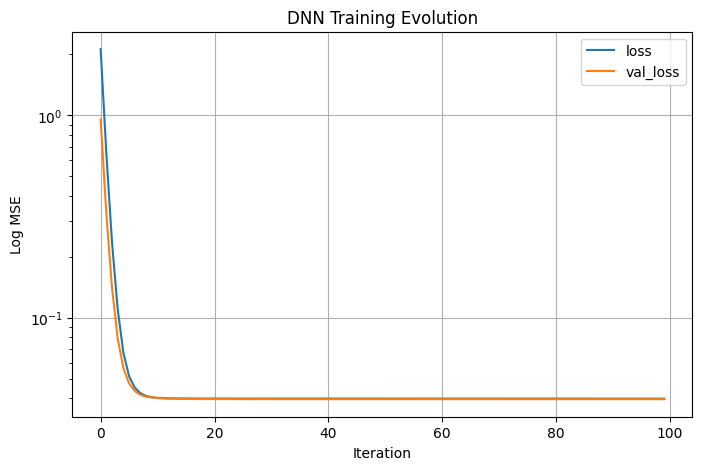

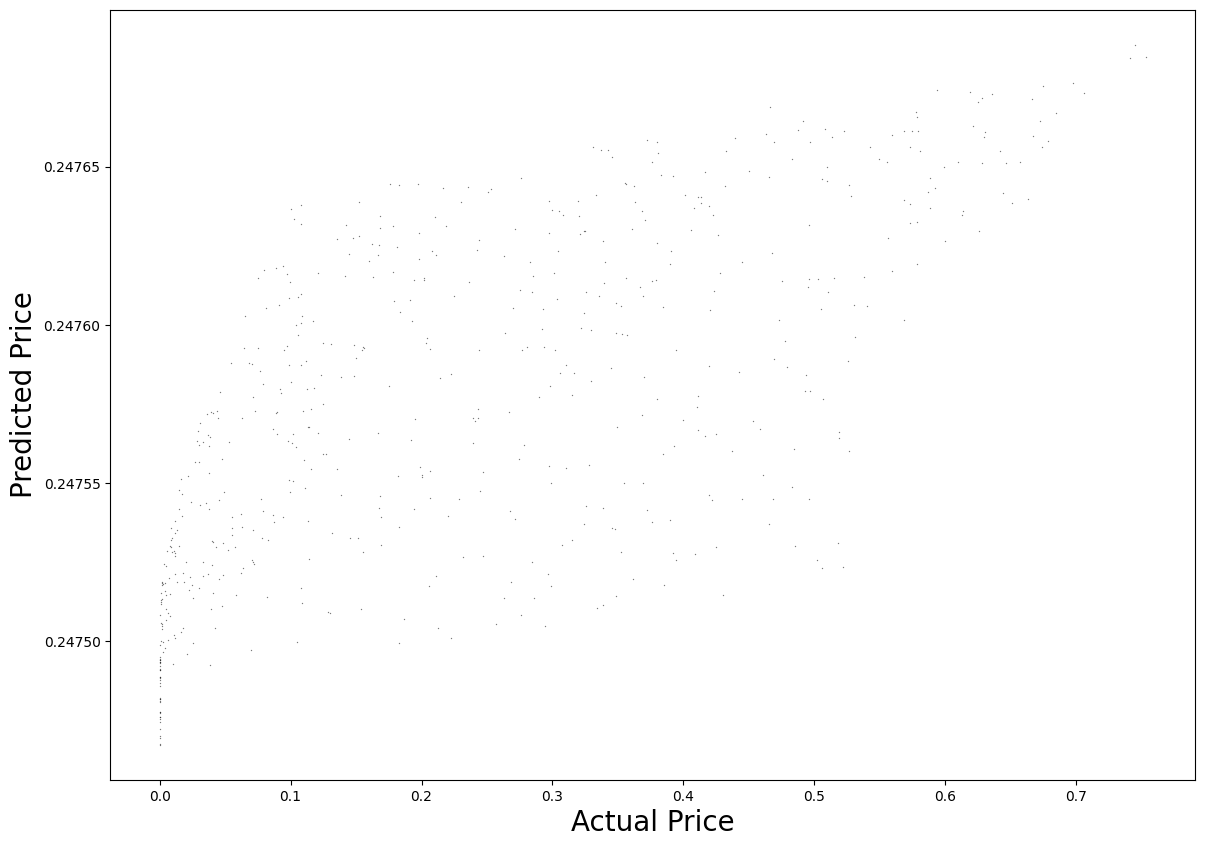

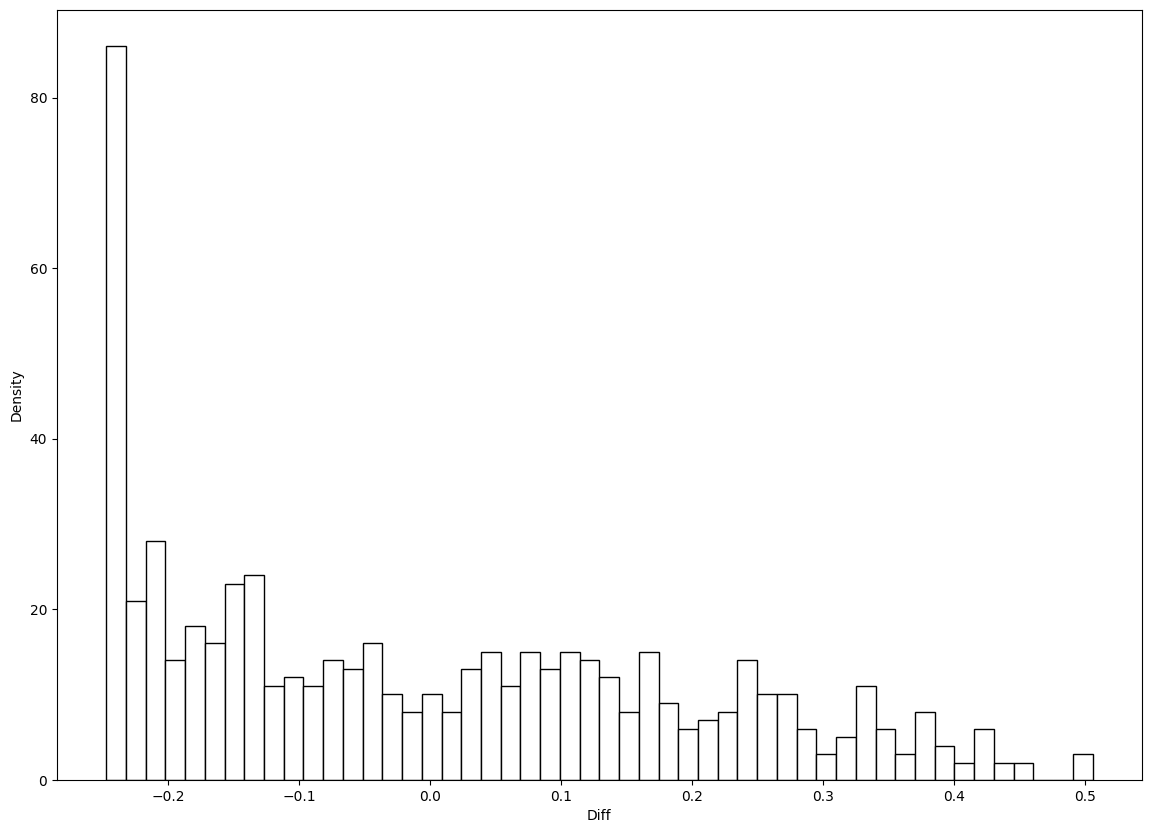

Mean Squared Error:       0.039603967115144745
Root Mean Squared Error:  0.19900745492353986
Mean Absolute Error:      0.17254137442736062
Mean Percent Error:       0.8227276082233809


In [21]:
y5_test_hat = NeuralNetwork(5, 60, 'sigmoid', 'adam', 100).predict(X_test)

y5_test_hat = np.squeeze(y5_test_hat)

CheckAccuracy_plots(y_test, y5_test_hat)
s = CheckAccuracy_dict(y_test, y5_test_hat)

In [22]:
deep_5_60_sig = CheckAccuracy_dict(y_test, y5_test_hat)
deep_5_60_sig.pop('diff')
deep_5_60_sig = {'DNN (5, 60, sig)': deep_5_60_sig}
deep_5_60_sig

Mean Squared Error:       0.039603967115144745
Root Mean Squared Error:  0.19900745492353986
Mean Absolute Error:      0.17254137442736062
Mean Percent Error:       0.8227276082233809


{'DNN (5, 60, sig)': {'mse': 0.039603967115144745,
  'rmse': 0.19900745492353986,
  'mae': 0.17254137442736062,
  'mpe': 0.8227276082233809}}

### Comparison of Key Accuracy Stats Across Neural Networks Using Varying Activation Functions

In [23]:
question2 = {**deep_5_60_relu, **deep_5_60_tanh, **deep_5_60_sig}

df = pd.DataFrame.from_dict(question2)
df

,"DNN (5, 60, Relu)","DNN (5, 60, tanh)","DNN (5, 60, sig)"
mse,0.000025,0.000430,0.039604
rmse,0.004966,0.020747,0.199007
mae,0.003754,0.015530,0.172541
mpe,0.020529,0.085769,0.822728


## Part A: Question 3

### DNN with 5 Layers of 10 Neurons Each (Activation: Relu, Nodes/Layer = 10)

Epoch 1/100
5/5 - 1s - loss: 0.6173 - val_loss: 0.5783 - 1s/epoch - 263ms/step
Epoch 2/100
5/5 - 0s - loss: 0.5460 - val_loss: 0.5120 - 42ms/epoch - 8ms/step
Epoch 3/100
5/5 - 0s - loss: 0.4844 - val_loss: 0.4551 - 56ms/epoch - 11ms/step
Epoch 4/100
5/5 - 0s - loss: 0.4293 - val_loss: 0.4014 - 44ms/epoch - 9ms/step
Epoch 5/100
5/5 - 0s - loss: 0.3781 - val_loss: 0.3525 - 50ms/epoch - 10ms/step
Epoch 6/100
5/5 - 0s - loss: 0.3305 - val_loss: 0.3056 - 44ms/epoch - 9ms/step
Epoch 7/100
5/5 - 0s - loss: 0.2845 - val_loss: 0.2604 - 60ms/epoch - 12ms/step
Epoch 8/100
5/5 - 0s - loss: 0.2410 - val_loss: 0.2183 - 43ms/epoch - 9ms/step
Epoch 9/100
5/5 - 0s - loss: 0.2006 - val_loss: 0.1800 - 45ms/epoch - 9ms/step
Epoch 10/100
5/5 - 0s - loss: 0.1648 - val_loss: 0.1466 - 42ms/epoch - 8ms/step
Epoch 11/100
5/5 - 0s - loss: 0.1338 - val_loss: 0.1190 - 58ms/epoch - 12ms/step
Epoch 12/100
5/5 - 0s - loss: 0.1091 - val_loss: 0.0972 - 46ms/epoch - 9ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0896 - val_lo

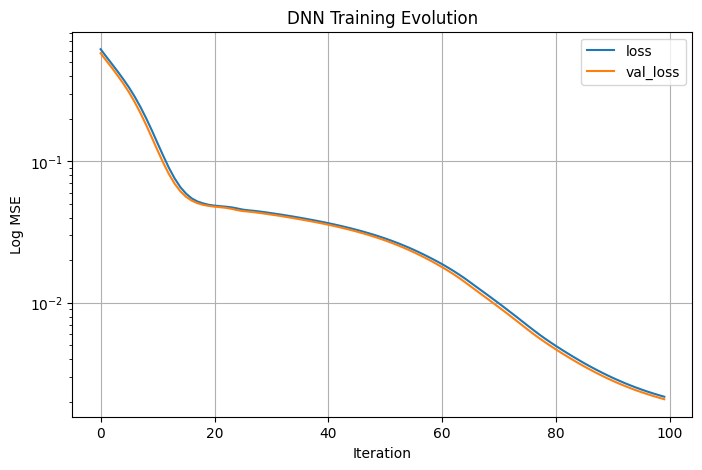

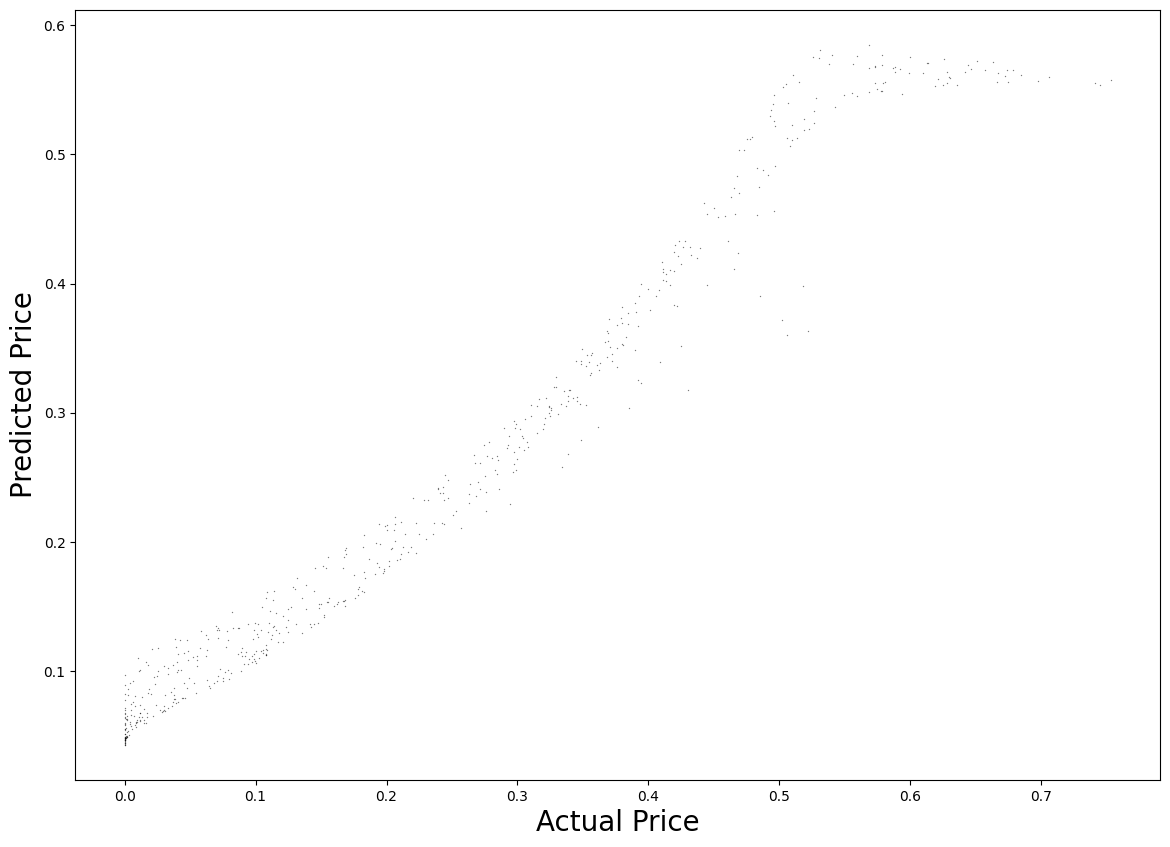

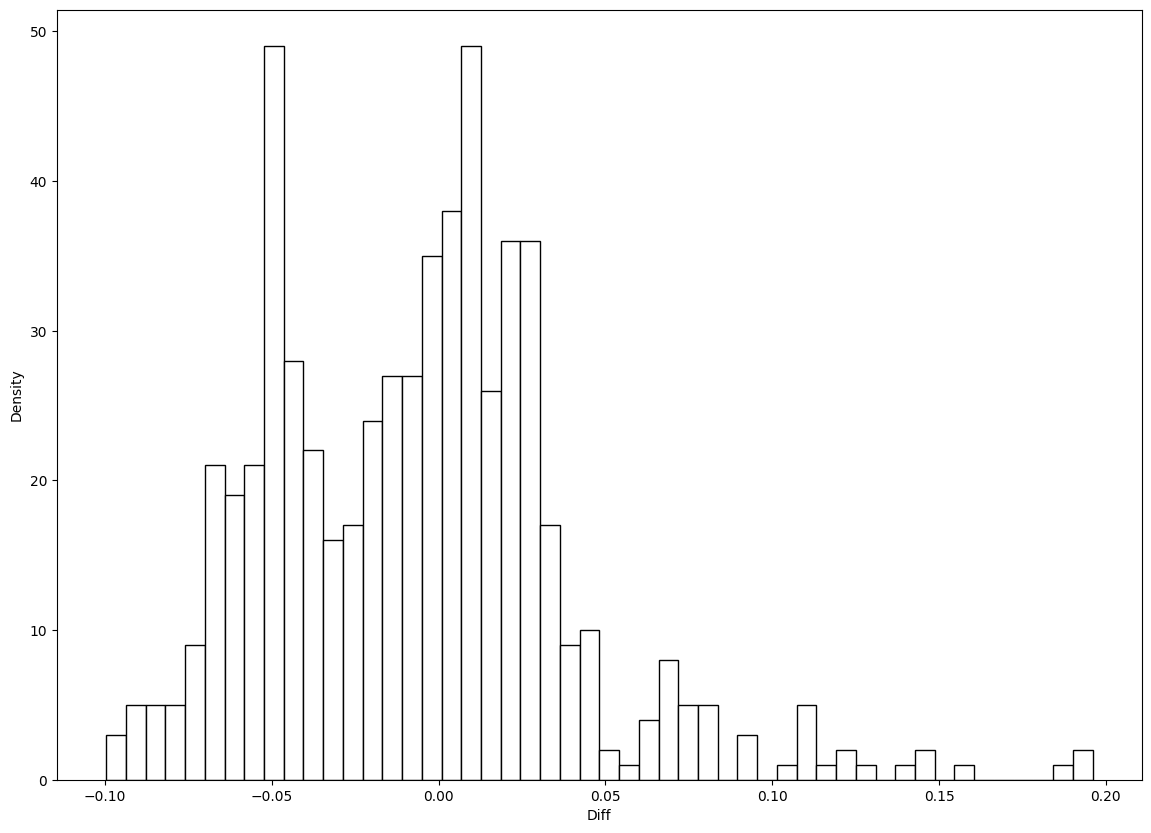

Mean Squared Error:       0.0020843560644706743
Root Mean Squared Error:  0.04565474854240985
Mean Absolute Error:      0.03503771318961056
Mean Percent Error:       0.18874379397881408


In [24]:
y6_test_hat = NeuralNetwork(5, 10, 'relu', 'adam', 100).predict(X_test)

y6_test_hat = np.squeeze(y6_test_hat)

CheckAccuracy_plots(y_test, y6_test_hat)
s = CheckAccuracy_dict(y_test, y6_test_hat)

In [25]:
deep_5_10_relu = CheckAccuracy_dict(y_test, y6_test_hat)
deep_5_10_relu.pop('diff')
deep_5_10_relu = {'DNN (5, 10, relu)': deep_5_10_relu}
deep_5_10_relu

Mean Squared Error:       0.0020843560644706743
Root Mean Squared Error:  0.04565474854240985
Mean Absolute Error:      0.03503771318961056
Mean Percent Error:       0.18874379397881408


{'DNN (5, 10, relu)': {'mse': 0.0020843560644706743,
  'rmse': 0.04565474854240985,
  'mae': 0.03503771318961056,
  'mpe': 0.18874379397881408}}

### DNN with 5 Layers of 50 Neurons Each (Activation: Relu, Nodes/Layer = 50)

Epoch 1/100
5/5 - 1s - loss: 0.5395 - val_loss: 0.4429 - 1s/epoch - 274ms/step
Epoch 2/100
5/5 - 0s - loss: 0.3777 - val_loss: 0.2879 - 65ms/epoch - 13ms/step
Epoch 3/100
5/5 - 0s - loss: 0.2311 - val_loss: 0.1572 - 64ms/epoch - 13ms/step
Epoch 4/100
5/5 - 0s - loss: 0.1215 - val_loss: 0.0832 - 67ms/epoch - 13ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0709 - val_loss: 0.0603 - 64ms/epoch - 13ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0600 - val_loss: 0.0594 - 67ms/epoch - 13ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0611 - val_loss: 0.0605 - 54ms/epoch - 11ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0614 - val_loss: 0.0588 - 53ms/epoch - 11ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0587 - val_loss: 0.0549 - 50ms/epoch - 10ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0544 - val_loss: 0.0509 - 47ms/epoch - 9ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0499 - val_loss: 0.0474 - 63ms/epoch - 13ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0461 - val_loss: 0.0434 - 68ms/epoch - 14ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0418 - 

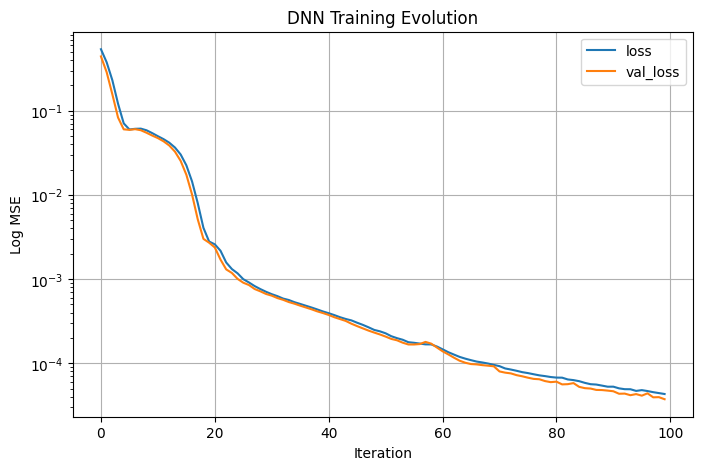

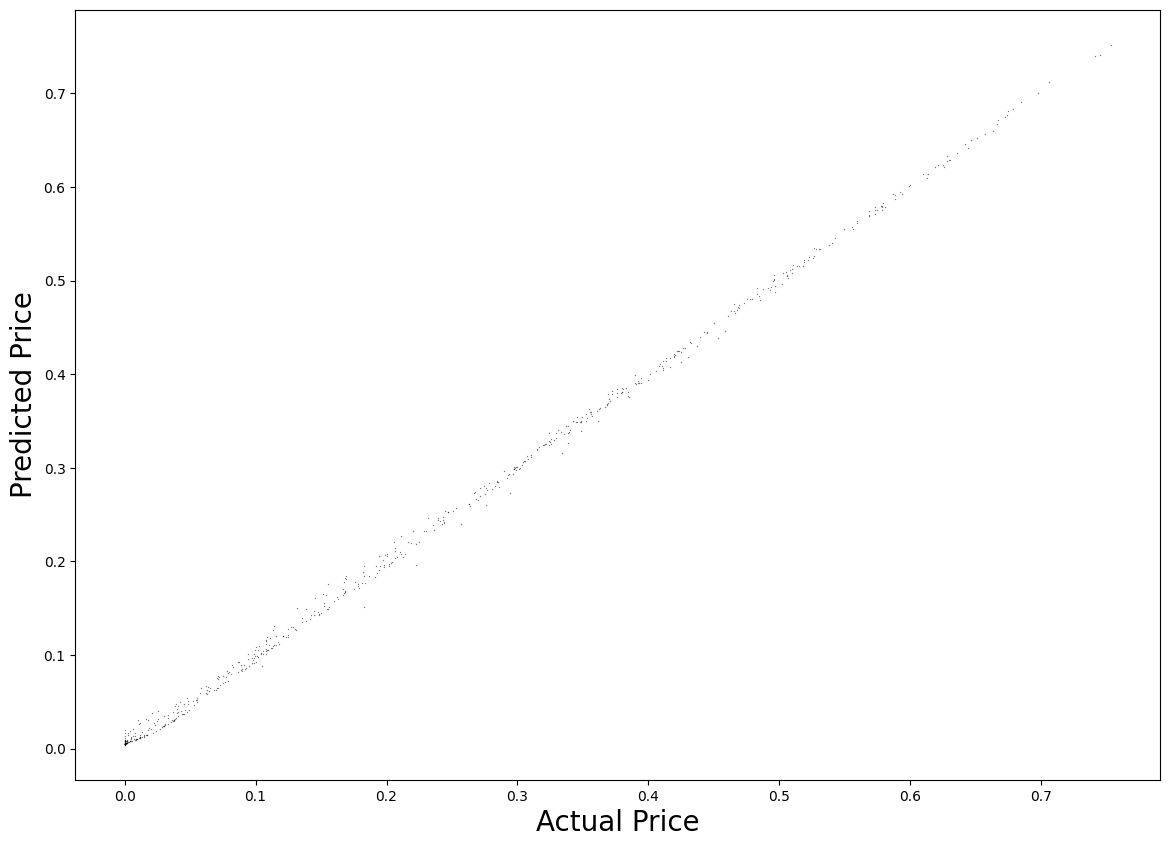

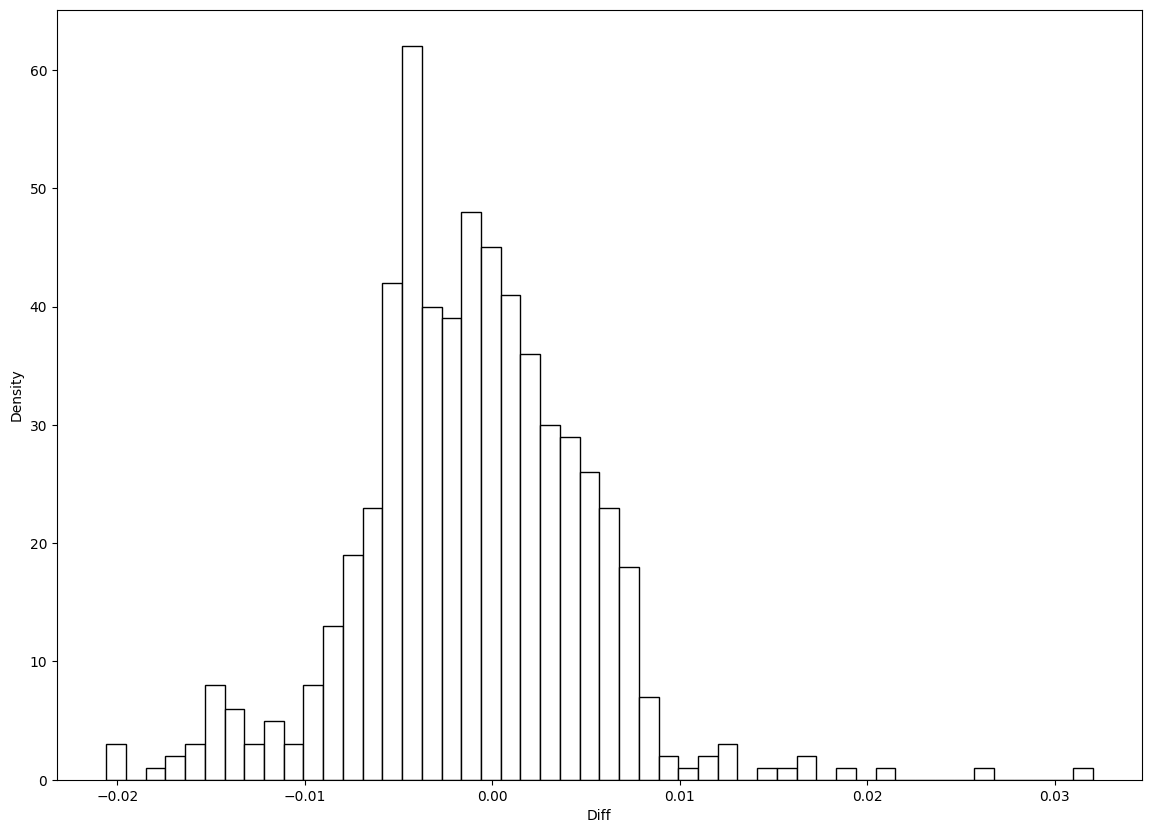

Mean Squared Error:       3.7425983061149915e-05
Root Mean Squared Error:  0.006117677914139474
Mean Absolute Error:      0.004622310027733599
Mean Percent Error:       0.025291426997620554


In [26]:
y7_test_hat = NeuralNetwork(5, 50, 'relu', 'adam', 100).predict(X_test)

y7_test_hat = np.squeeze(y7_test_hat)

CheckAccuracy_plots(y_test, y7_test_hat)
s = CheckAccuracy_dict(y_test, y7_test_hat)

In [27]:
deep_5_50_relu = CheckAccuracy_dict(y_test, y7_test_hat)
deep_5_50_relu.pop('diff')
deep_5_50_relu = {'DNN (5, 50, relu)': deep_5_50_relu}
deep_5_50_relu

Mean Squared Error:       3.7425983061149915e-05
Root Mean Squared Error:  0.006117677914139474
Mean Absolute Error:      0.004622310027733599
Mean Percent Error:       0.025291426997620554


{'DNN (5, 50, relu)': {'mse': 3.7425983061149915e-05,
  'rmse': 0.006117677914139474,
  'mae': 0.004622310027733599,
  'mpe': 0.025291426997620554}}

### DNN with 5 Layers of 100 Neurons Each (Activation: Relu, Nodes/Layer = 100)

Epoch 1/100
5/5 - 1s - loss: 0.5293 - val_loss: 0.2986 - 1s/epoch - 267ms/step
Epoch 2/100
5/5 - 0s - loss: 0.2004 - val_loss: 0.0915 - 77ms/epoch - 15ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0666 - val_loss: 0.0537 - 62ms/epoch - 12ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0586 - val_loss: 0.0634 - 90ms/epoch - 18ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0668 - val_loss: 0.0656 - 67ms/epoch - 13ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0657 - val_loss: 0.0594 - 62ms/epoch - 12ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0572 - val_loss: 0.0492 - 62ms/epoch - 12ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0471 - val_loss: 0.0441 - 79ms/epoch - 16ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0437 - val_loss: 0.0422 - 65ms/epoch - 13ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0393 - val_loss: 0.0351 - 60ms/epoch - 12ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0336 - val_loss: 0.0302 - 80ms/epoch - 16ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0279 - val_loss: 0.0231 - 76ms/epoch - 15ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0209 -

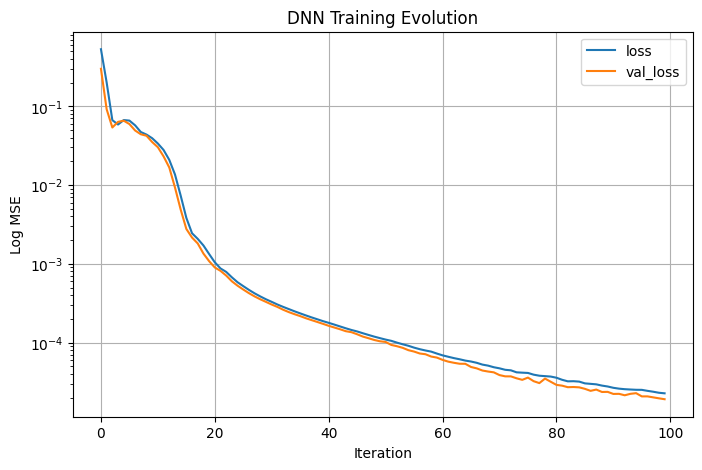

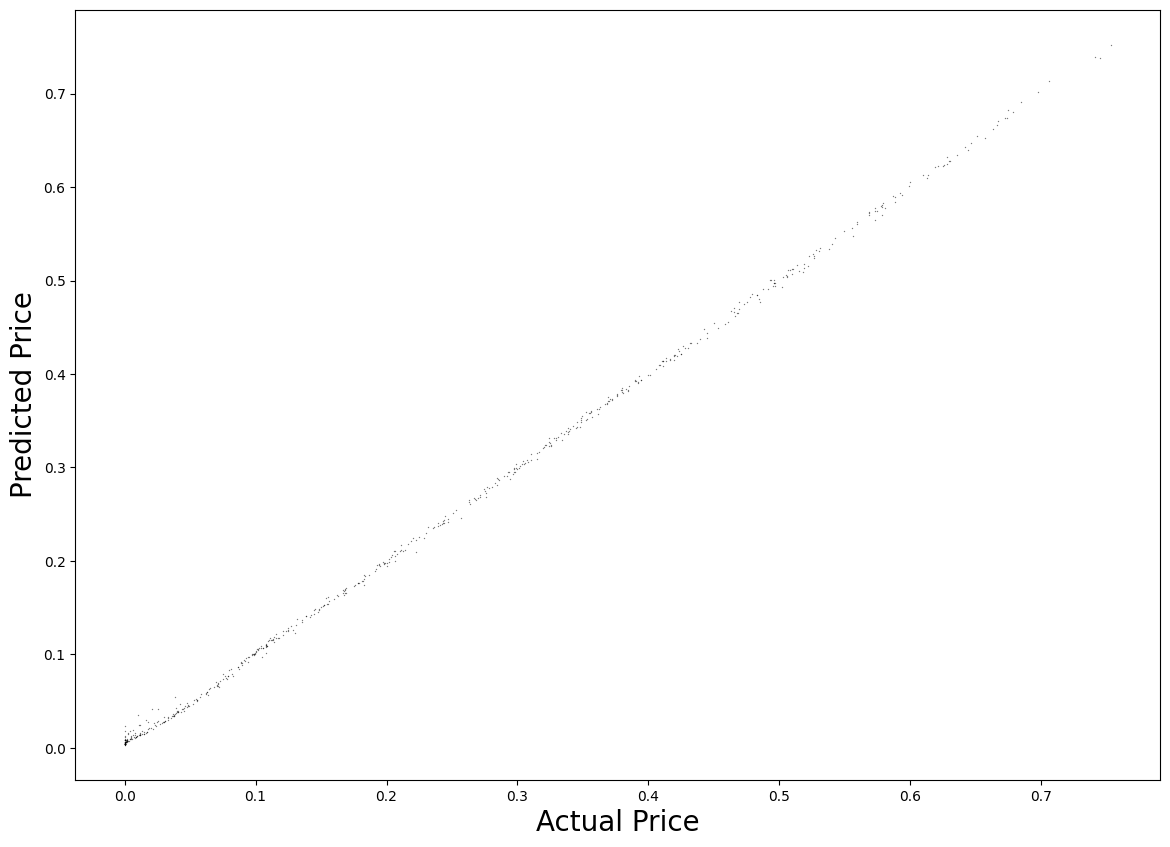

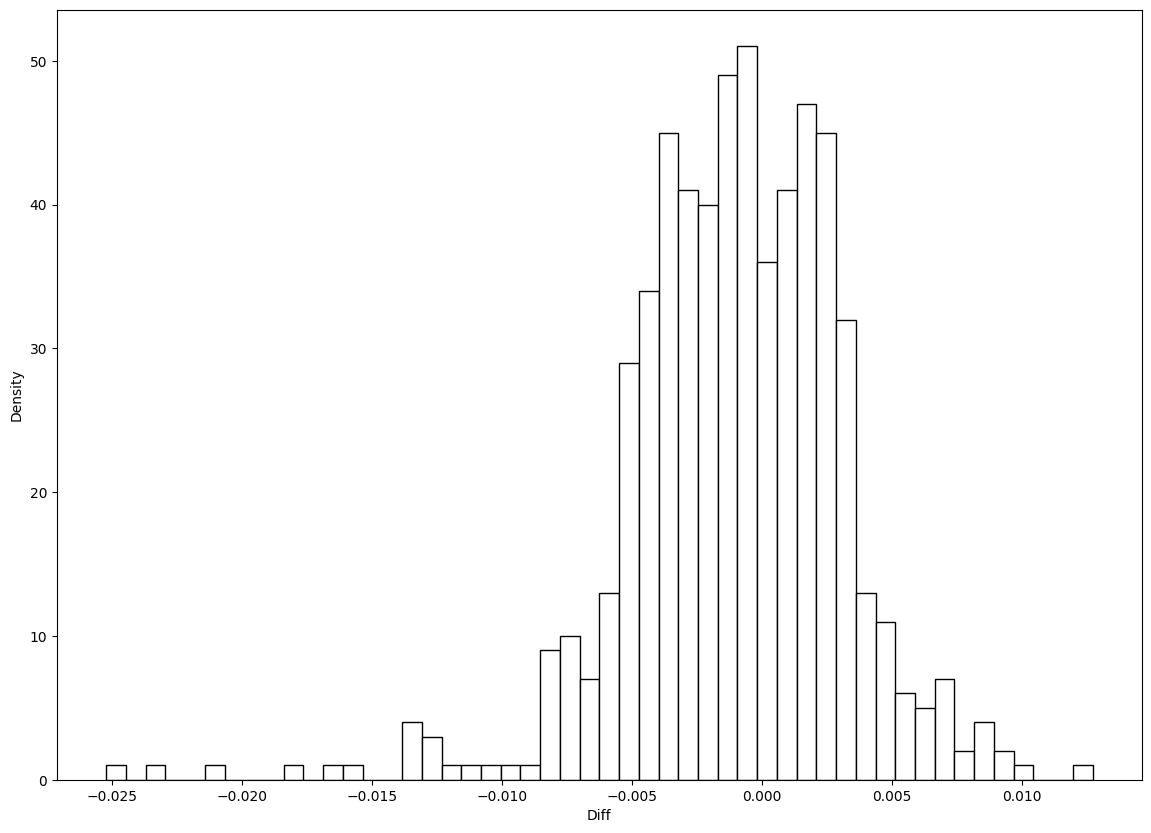

Mean Squared Error:       1.9126134121296974e-05
Root Mean Squared Error:  0.004373343586010248
Mean Absolute Error:      0.003216977529724872
Mean Percent Error:       0.01808007900929983


{'diff': array([ 1.56747639e-03, -3.50177939e-03, -3.41555951e-03,  3.28947641e-03,
        -2.33633136e-03, -8.41877252e-04, -5.09287559e-03,  7.24530932e-03,
        -4.76342171e-03,  3.08182476e-04, -7.15192672e-04, -1.44723462e-03,
        -2.19764115e-03, -1.66108678e-03, -1.37501701e-03, -3.64762871e-03,
         1.36514136e-03, -4.55773742e-03,  8.37363996e-04, -1.40385711e-03,
        -8.64281965e-04,  2.55768581e-03, -8.02320711e-03,  3.54730210e-03,
         5.99598485e-03,  3.24248621e-03,  1.68555308e-03, -2.32574657e-03,
         2.99763981e-03,  2.83621659e-03,  4.49436492e-04, -1.97804100e-03,
        -2.28773057e-03,  2.12398882e-03, -4.46811935e-03, -2.26376841e-03,
        -4.26806900e-03,  2.61531670e-03, -2.19408725e-04,  2.83719105e-03,
        -4.52647137e-03, -1.61504885e-03, -5.63881340e-05, -2.82964565e-03,
         1.45826983e-03, -4.32187917e-04, -5.10572085e-03, -3.59712143e-03,
         2.78025868e-03, -3.53670472e-03, -1.07492758e-03, -6.50503614e-03,
    

In [28]:
y8_test_hat = NeuralNetwork(5, 100, 'relu', 'adam', 100).predict(X_test)

y8_test_hat = np.squeeze(y8_test_hat)

CheckAccuracy_plots(y_test, y8_test_hat)
CheckAccuracy_dict(y_test, y8_test_hat)

In [29]:
deep_5_100_relu = CheckAccuracy_dict(y_test, y8_test_hat)
deep_5_100_relu.pop('diff')
deep_5_100_relu = {'DNN (5, 100, relu, adam, 100 epochs)': deep_5_100_relu}
deep_5_100_relu

Mean Squared Error:       1.9126134121296974e-05
Root Mean Squared Error:  0.004373343586010248
Mean Absolute Error:      0.003216977529724872
Mean Percent Error:       0.01808007900929983


{'DNN (5, 100, relu, adam, 100 epochs)': {'mse': 1.9126134121296974e-05,
  'rmse': 0.004373343586010248,
  'mae': 0.003216977529724872,
  'mpe': 0.01808007900929983}}

### Comparison of Key Accuracy Stats for Neural Networks Using Varying Number of Nodes Per Layer

In [30]:
question3 = {**deep_5_10_relu, **deep_5_50_relu, **deep_5_60_relu}
question3 = {**question3, **deep_5_100_relu}

df = pd.DataFrame.from_dict(question3)
df

,"DNN (5, 10, relu)","DNN (5, 50, relu)","DNN (5, 60, Relu)","DNN (5, 100, relu, adam, 100 epochs)"
mse,0.002084,0.000037,0.000025,0.000019
rmse,0.045655,0.006118,0.004966,0.004373
mae,0.035038,0.004622,0.003754,0.003217
mpe,0.188744,0.025291,0.020529,0.018080


## Part A: Question 4

### DNN with 5 Layers (Activation: Relu, Nodes/Layer = 100, rmsprop)

Epoch 1/100
5/5 - 1s - loss: 0.3653 - val_loss: 0.1021 - 951ms/epoch - 190ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0711 - val_loss: 0.0522 - 60ms/epoch - 12ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0504 - val_loss: 0.0466 - 59ms/epoch - 12ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0450 - val_loss: 0.0405 - 69ms/epoch - 14ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0380 - val_loss: 0.0317 - 59ms/epoch - 12ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0280 - val_loss: 0.0231 - 64ms/epoch - 13ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0219 - val_loss: 0.0168 - 82ms/epoch - 16ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0145 - val_loss: 0.0095 - 83ms/epoch - 17ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0109 - val_loss: 0.0095 - 61ms/epoch - 12ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0080 - val_loss: 0.0079 - 61ms/epoch - 12ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0069 - val_loss: 0.0071 - 73ms/epoch - 15ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0065 - val_loss: 0.0045 - 95ms/epoch - 19ms/step
Epoch 13/100
5/5 - 0s - loss: 0.005

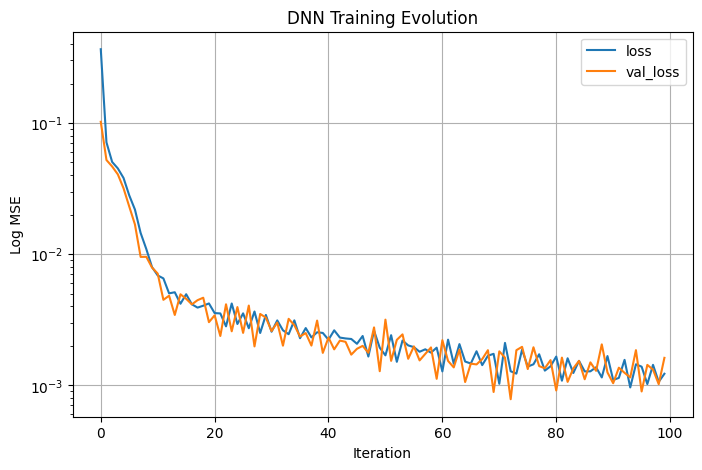

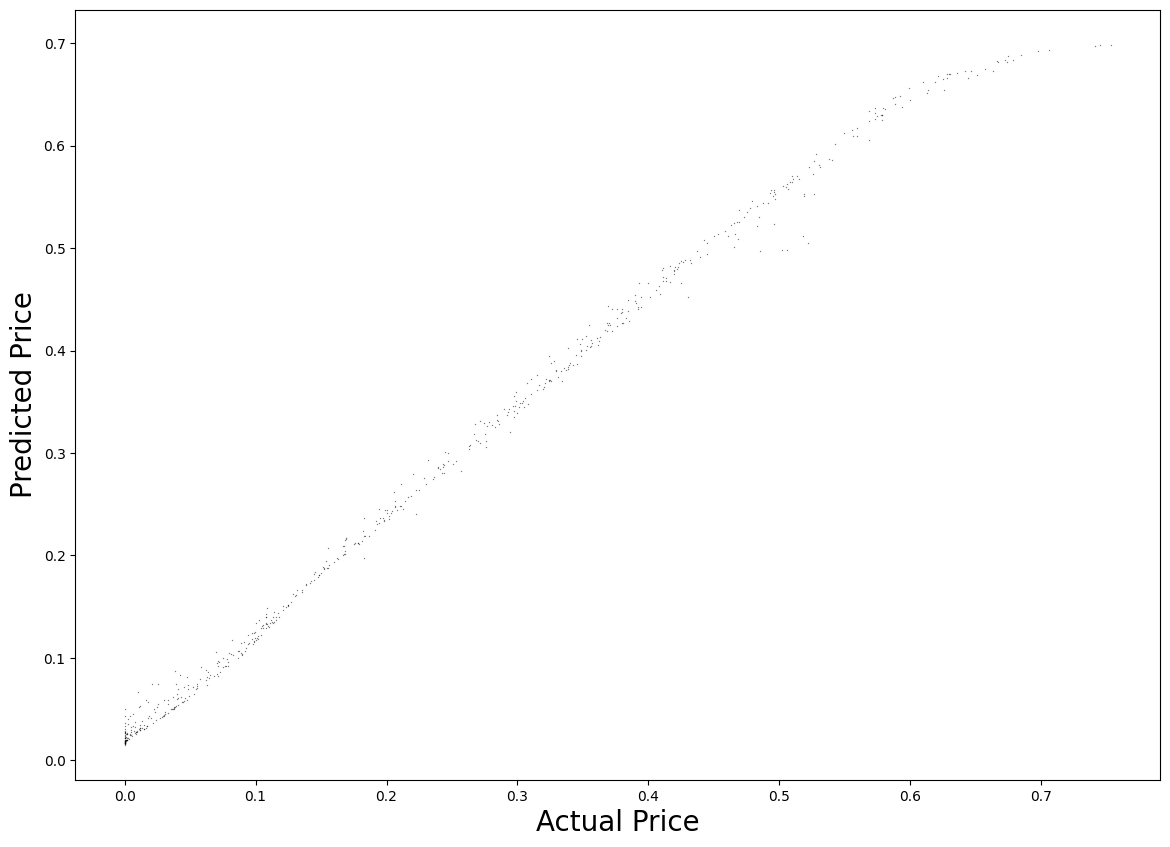

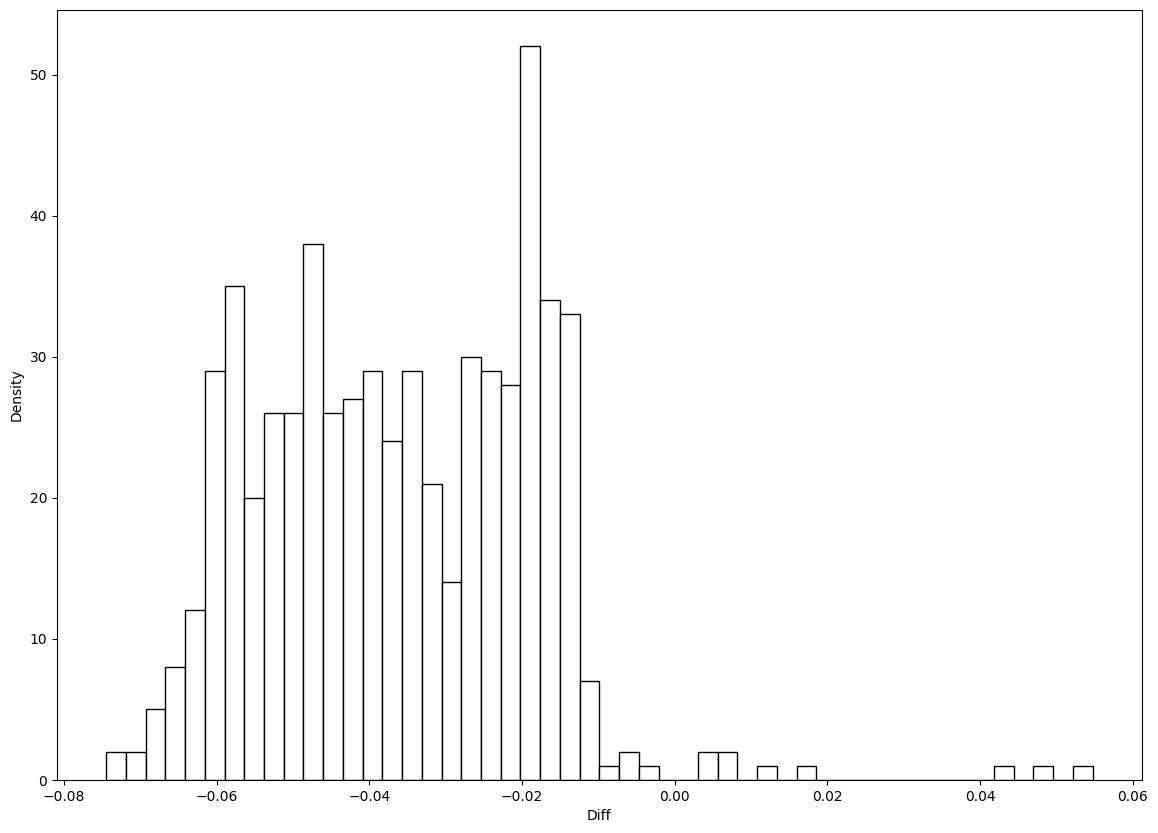

Mean Squared Error:       0.0016146996093603463
Root Mean Squared Error:  0.04018332501623461
Mean Absolute Error:      0.03677602159683221
Mean Percent Error:       0.166124082606711


In [31]:
y9_test_hat = NeuralNetwork(5, 100, 'relu', 'rmsprop', 100).predict(X_test)

y9_test_hat = np.squeeze(y9_test_hat)

CheckAccuracy_plots(y_test, y9_test_hat)
s = CheckAccuracy_dict(y_test, y9_test_hat)

In [32]:
deep_5_100_relu_rms = CheckAccuracy_dict(y_test, y9_test_hat)
deep_5_100_relu_rms.pop('diff')
deep_5_100_relu_rms = {'DNN (5, 100, relu, rms)': deep_5_100_relu_rms}
deep_5_100_relu_rms

Mean Squared Error:       0.0016146996093603463
Root Mean Squared Error:  0.04018332501623461
Mean Absolute Error:      0.03677602159683221
Mean Percent Error:       0.166124082606711


{'DNN (5, 100, relu, rms)': {'mse': 0.0016146996093603463,
  'rmse': 0.04018332501623461,
  'mae': 0.03677602159683221,
  'mpe': 0.166124082606711}}

### DNN with 5 Layers (Activation: Relu, Nodes/Layer = 100, sgd)

Epoch 1/100
5/5 - 1s - loss: 0.3972 - val_loss: 0.2725 - 823ms/epoch - 165ms/step
Epoch 2/100
5/5 - 0s - loss: 0.2275 - val_loss: 0.1805 - 59ms/epoch - 12ms/step
Epoch 3/100
5/5 - 0s - loss: 0.1568 - val_loss: 0.1341 - 74ms/epoch - 15ms/step
Epoch 4/100
5/5 - 0s - loss: 0.1196 - val_loss: 0.1072 - 63ms/epoch - 13ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0975 - val_loss: 0.0904 - 75ms/epoch - 15ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0835 - val_loss: 0.0793 - 59ms/epoch - 12ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0743 - val_loss: 0.0717 - 62ms/epoch - 12ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0679 - val_loss: 0.0664 - 74ms/epoch - 15ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0634 - val_loss: 0.0625 - 60ms/epoch - 12ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0602 - val_loss: 0.0596 - 79ms/epoch - 16ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0577 - val_loss: 0.0575 - 82ms/epoch - 16ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0559 - val_loss: 0.0558 - 77ms/epoch - 15ms/step
Epoch 13/100
5/5 - 0s - loss: 0.054

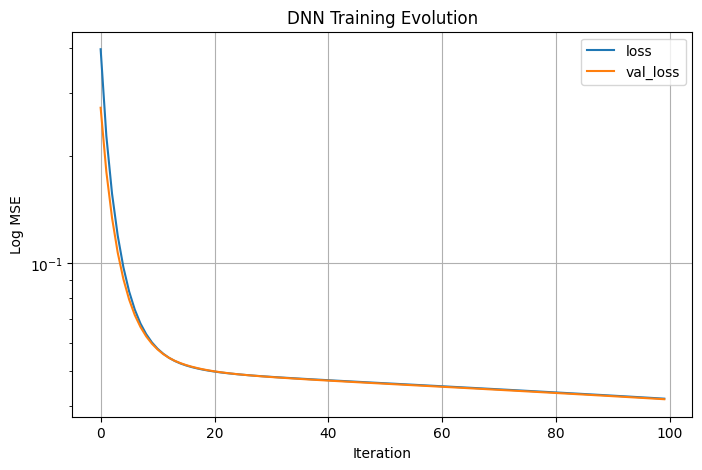

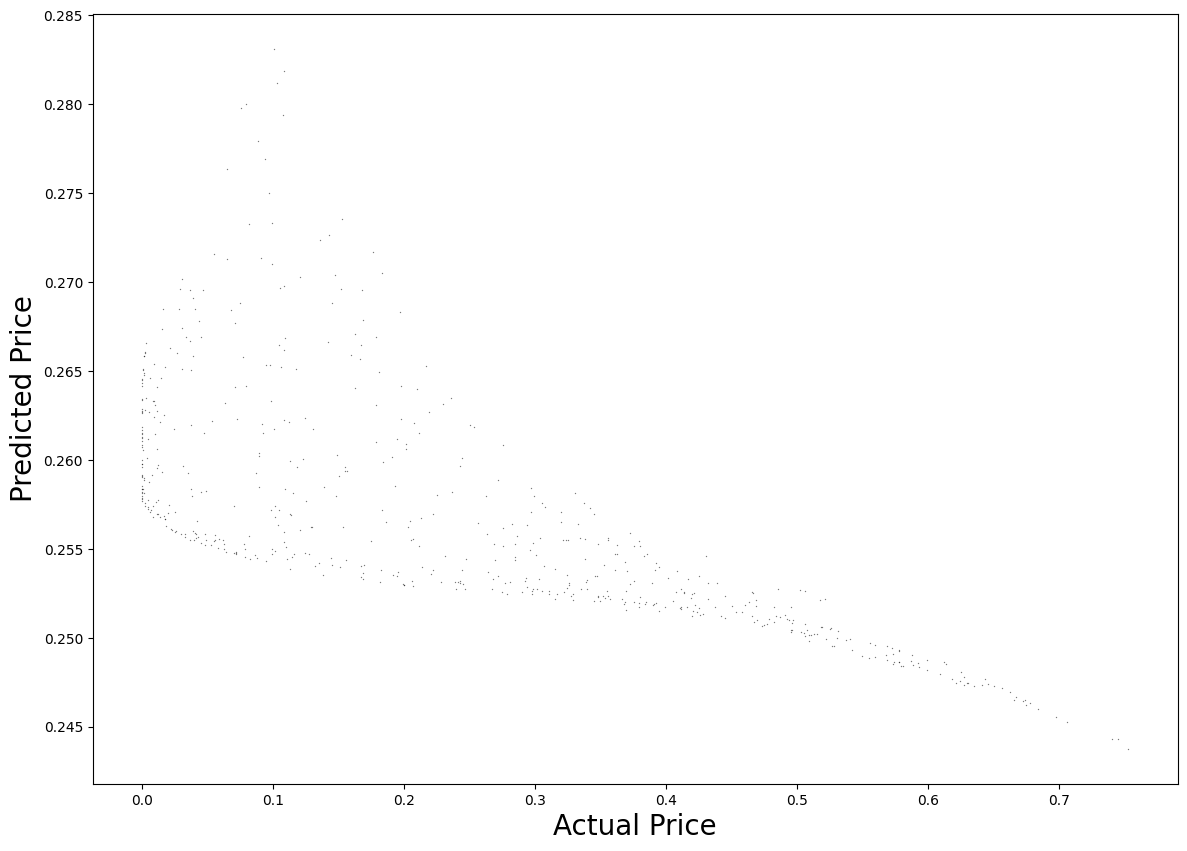

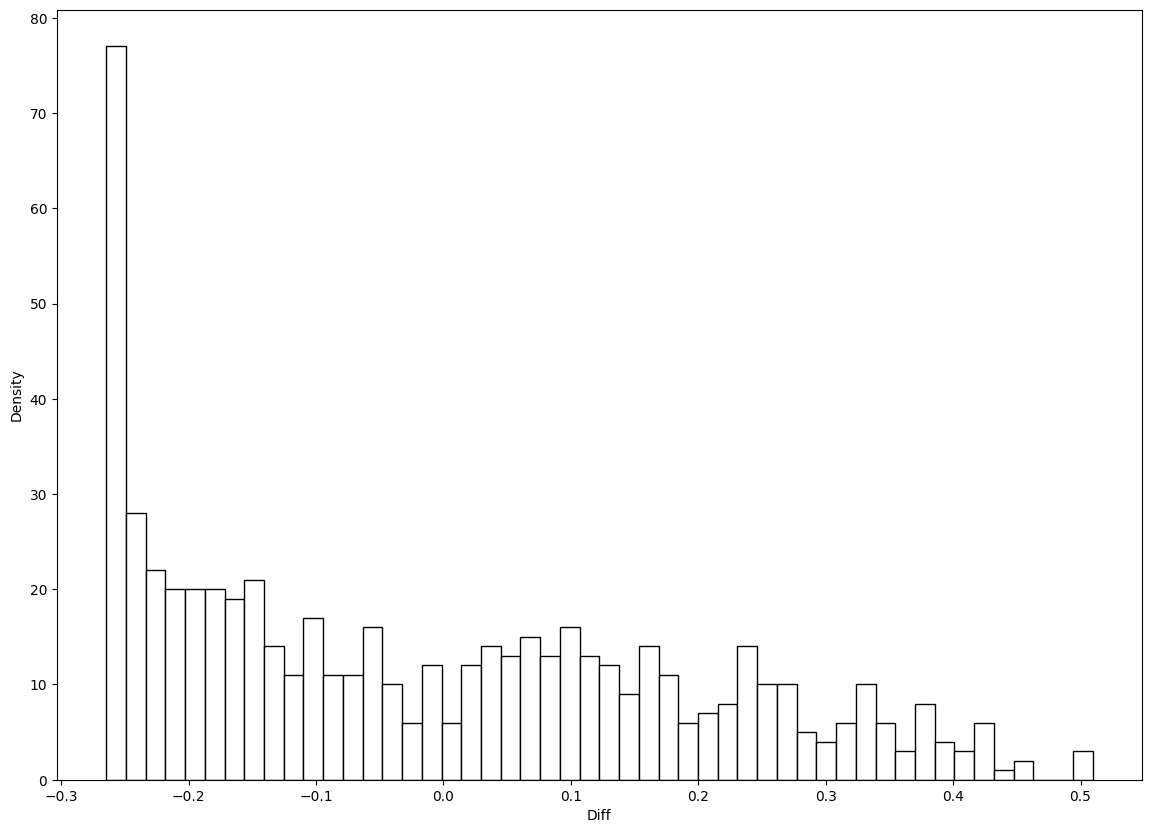

Mean Squared Error:       0.041711254098346445
Root Mean Squared Error:  0.20423333248602307
Mean Absolute Error:      0.17796932024421167
Mean Percent Error:       0.8443321945917757


In [33]:
y10_test_hat = NeuralNetwork(5, 100, 'relu', 'sgd', 100).predict(X_test)

y10_test_hat = np.squeeze(y10_test_hat)

CheckAccuracy_plots(y_test, y10_test_hat)
s = CheckAccuracy_dict(y_test, y10_test_hat)

In [34]:
deep_5_100_relu_sgd = CheckAccuracy_dict(y_test, y10_test_hat)
deep_5_100_relu_sgd.pop('diff')
deep_5_100_relu_sgd = {'DNN (5, 100, relu, sgd)': deep_5_100_relu_sgd}
deep_5_100_relu_sgd

Mean Squared Error:       0.041711254098346445
Root Mean Squared Error:  0.20423333248602307
Mean Absolute Error:      0.17796932024421167
Mean Percent Error:       0.8443321945917757


{'DNN (5, 100, relu, sgd)': {'mse': 0.041711254098346445,
  'rmse': 0.20423333248602307,
  'mae': 0.17796932024421167,
  'mpe': 0.8443321945917757}}

### Comparison of Key Accuracy Stats for Neural Networks Using Various Optimizers

In [35]:
question4 = {**deep_5_100_relu, **deep_5_100_relu_rms, **deep_5_100_relu_sgd}

df = pd.DataFrame.from_dict(question4)
df

,"DNN (5, 100, relu, adam, 100 epochs)","DNN (5, 100, relu, rms)","DNN (5, 100, relu, sgd)"
mse,0.000019,0.001615,0.041711
rmse,0.004373,0.040183,0.204233
mae,0.003217,0.036776,0.177969
mpe,0.018080,0.166124,0.844332


## Part A: Question 5

### Comparison of Key Accuracy Stats for Neural Networks Using Various Optimizers

Epoch 1/500
5/5 - 1s - loss: 0.4866 - val_loss: 0.2772 - 1s/epoch - 272ms/step
Epoch 2/500
5/5 - 0s - loss: 0.1910 - val_loss: 0.0909 - 63ms/epoch - 13ms/step
Epoch 3/500
5/5 - 0s - loss: 0.0679 - val_loss: 0.0552 - 76ms/epoch - 15ms/step
Epoch 4/500
5/5 - 0s - loss: 0.0599 - val_loss: 0.0646 - 92ms/epoch - 18ms/step
Epoch 5/500
5/5 - 0s - loss: 0.0682 - val_loss: 0.0674 - 63ms/epoch - 13ms/step
Epoch 6/500
5/5 - 0s - loss: 0.0681 - val_loss: 0.0627 - 63ms/epoch - 13ms/step
Epoch 7/500
5/5 - 0s - loss: 0.0612 - val_loss: 0.0538 - 66ms/epoch - 13ms/step
Epoch 8/500
5/5 - 0s - loss: 0.0516 - val_loss: 0.0457 - 76ms/epoch - 15ms/step
Epoch 9/500
5/5 - 0s - loss: 0.0445 - val_loss: 0.0424 - 66ms/epoch - 13ms/step
Epoch 10/500
5/5 - 0s - loss: 0.0411 - val_loss: 0.0378 - 78ms/epoch - 16ms/step
Epoch 11/500
5/5 - 0s - loss: 0.0358 - val_loss: 0.0323 - 66ms/epoch - 13ms/step
Epoch 12/500
5/5 - 0s - loss: 0.0303 - val_loss: 0.0254 - 66ms/epoch - 13ms/step
Epoch 13/500
5/5 - 0s - loss: 0.0225 -

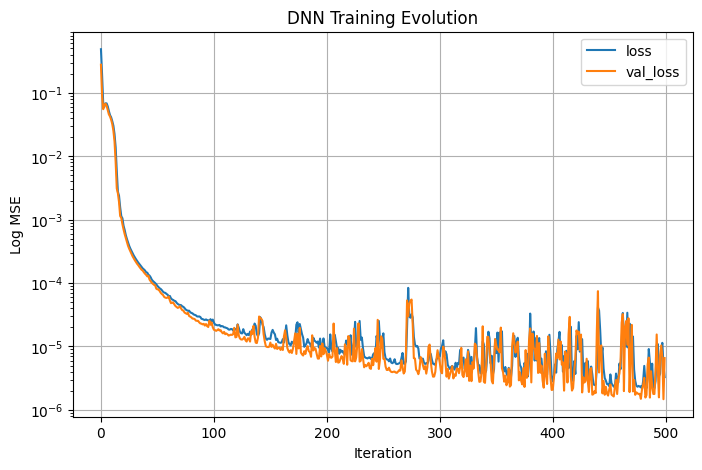

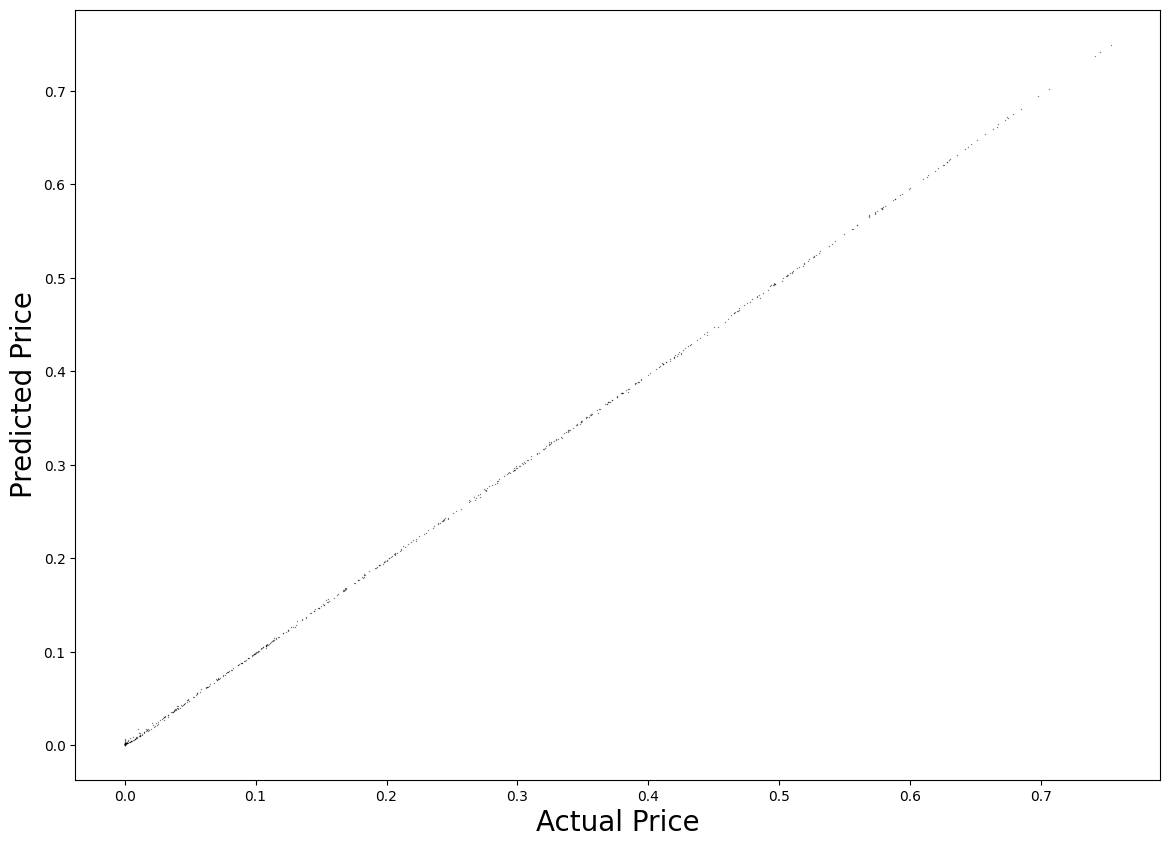

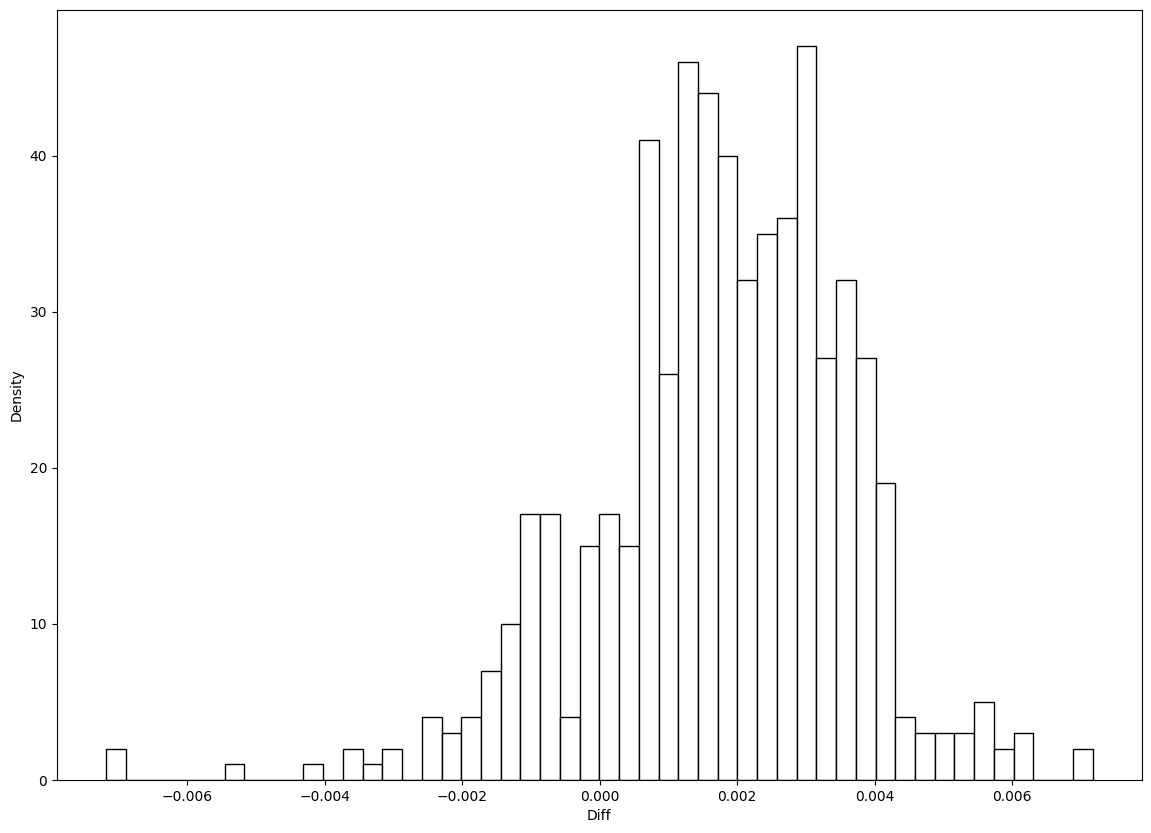

Mean Squared Error:       6.5628330177339785e-06
Root Mean Squared Error:  0.002561802689071502
Mean Absolute Error:      0.002180763061587144
Mean Percent Error:       0.01059088866761199


In [36]:
y11_test_hat = NeuralNetwork(5, 100, 'relu', 'adam', 500).predict(X_test)

y11_test_hat = np.squeeze(y11_test_hat)

CheckAccuracy_plots(y_test, y11_test_hat)
s = CheckAccuracy_dict(y_test, y11_test_hat)

In [37]:
deep_5_100_relu_adam_500 = CheckAccuracy_dict(y_test, y11_test_hat)
deep_5_100_relu_adam_500.pop('diff')
deep_5_100_relu_adam_500 = {'DNN (5, 100, relu, adam, 500 epochs)': deep_5_100_relu_adam_500}
deep_5_100_relu_adam_500

Mean Squared Error:       6.5628330177339785e-06
Root Mean Squared Error:  0.002561802689071502
Mean Absolute Error:      0.002180763061587144
Mean Percent Error:       0.01059088866761199


{'DNN (5, 100, relu, adam, 500 epochs)': {'mse': 6.5628330177339785e-06,
  'rmse': 0.002561802689071502,
  'mae': 0.002180763061587144,
  'mpe': 0.01059088866761199}}

Epoch 1/1000
5/5 - 1s - loss: 0.4373 - val_loss: 0.2320 - 1s/epoch - 279ms/step
Epoch 2/1000
5/5 - 0s - loss: 0.1509 - val_loss: 0.0695 - 79ms/epoch - 16ms/step
Epoch 3/1000
5/5 - 0s - loss: 0.0614 - val_loss: 0.0615 - 81ms/epoch - 16ms/step
Epoch 4/1000
5/5 - 0s - loss: 0.0672 - val_loss: 0.0706 - 67ms/epoch - 13ms/step
Epoch 5/1000
5/5 - 0s - loss: 0.0734 - val_loss: 0.0707 - 63ms/epoch - 13ms/step
Epoch 6/1000
5/5 - 0s - loss: 0.0709 - val_loss: 0.0645 - 65ms/epoch - 13ms/step
Epoch 7/1000
5/5 - 0s - loss: 0.0627 - val_loss: 0.0553 - 75ms/epoch - 15ms/step
Epoch 8/1000
5/5 - 0s - loss: 0.0532 - val_loss: 0.0477 - 79ms/epoch - 16ms/step
Epoch 9/1000
5/5 - 0s - loss: 0.0465 - val_loss: 0.0430 - 78ms/epoch - 16ms/step
Epoch 10/1000
5/5 - 0s - loss: 0.0410 - val_loss: 0.0366 - 76ms/epoch - 15ms/step
Epoch 11/1000
5/5 - 0s - loss: 0.0342 - val_loss: 0.0299 - 80ms/epoch - 16ms/step
Epoch 12/1000
5/5 - 0s - loss: 0.0278 - val_loss: 0.0224 - 83ms/epoch - 17ms/step
Epoch 13/1000
5/5 - 0s - l

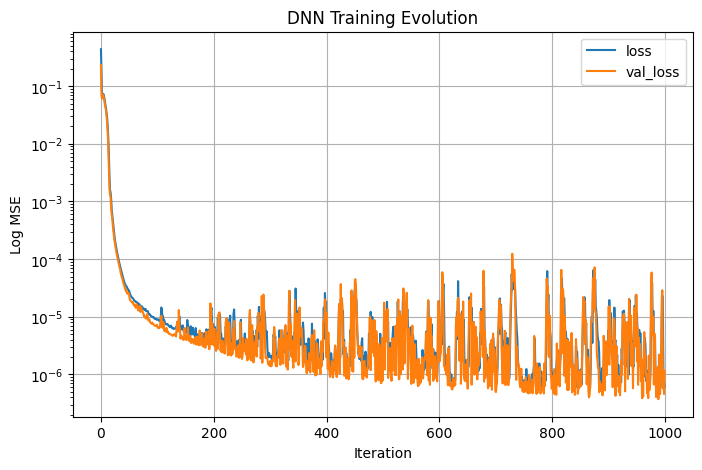

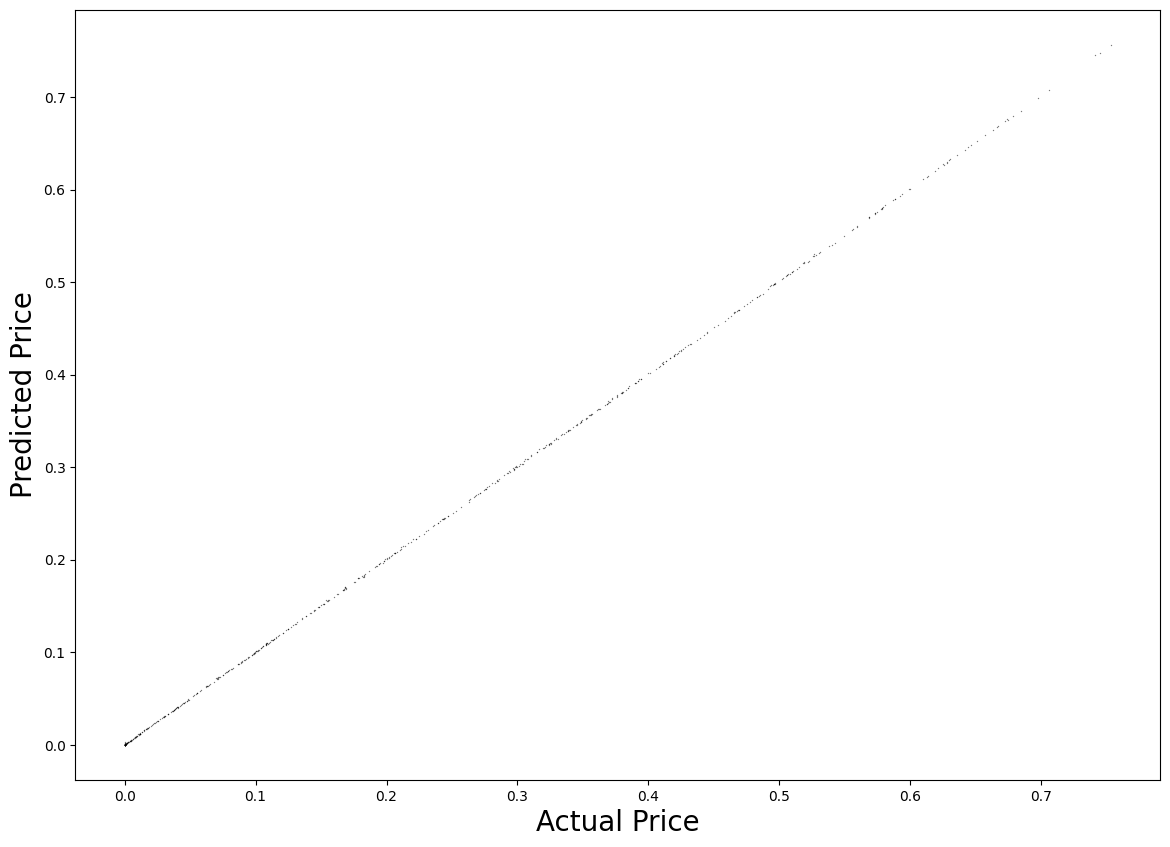

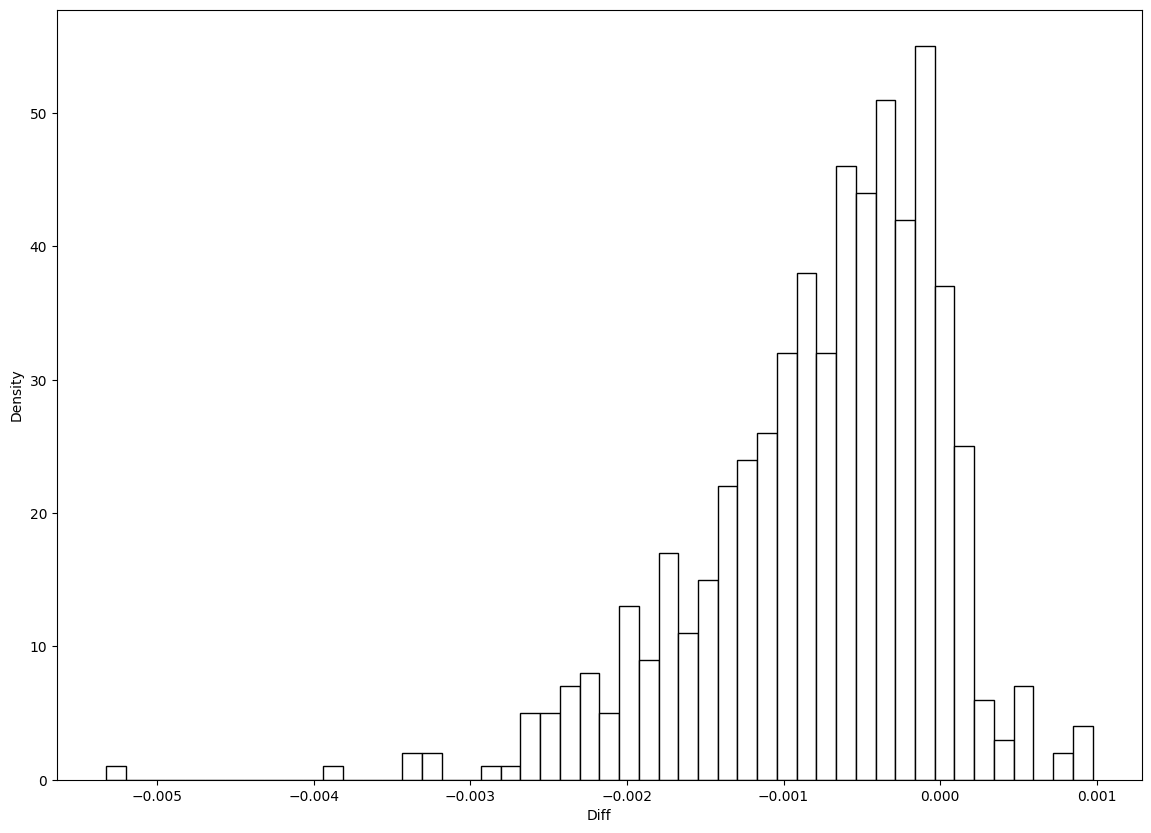

Mean Squared Error:       1.15745657196749e-06
Root Mean Squared Error:  0.0010758515566598814
Mean Absolute Error:      0.0008083860709390257
Mean Percent Error:       0.00444773678631416


In [38]:
y12_test_hat = NeuralNetwork(5, 100, 'relu', 'adam', 1000).predict(X_test)

y12_test_hat = np.squeeze(y12_test_hat)

CheckAccuracy_plots(y_test, y12_test_hat)
s = CheckAccuracy_dict(y_test, y12_test_hat)

In [39]:
deep_5_100_relu_adam_1000 = CheckAccuracy_dict(y_test, y12_test_hat)
deep_5_100_relu_adam_1000.pop('diff')
deep_5_100_relu_adam_1000 = {'DNN (5, 100, relu, adam, 1000 epochs)': deep_5_100_relu_adam_1000}
deep_5_100_relu_adam_1000

Mean Squared Error:       1.15745657196749e-06
Root Mean Squared Error:  0.0010758515566598814
Mean Absolute Error:      0.0008083860709390257
Mean Percent Error:       0.00444773678631416


{'DNN (5, 100, relu, adam, 1000 epochs)': {'mse': 1.15745657196749e-06,
  'rmse': 0.0010758515566598814,
  'mae': 0.0008083860709390257,
  'mpe': 0.00444773678631416}}

### Comparison of Key Accuracy Stats for Neural Networks Running Varying Epochs

In [40]:
question4 = {**deep_5_100_relu, **deep_5_100_relu_adam_500, **deep_5_100_relu_adam_1000}

df = pd.DataFrame.from_dict(question4)
df

,"DNN (5, 100, relu, adam, 100 epochs)","DNN (5, 100, relu, adam, 500 epochs)","DNN (5, 100, relu, adam, 1000 epochs)"
mse,0.000019,0.000007,0.000001
rmse,0.004373,0.002562,0.001076
mae,0.003217,0.002181,0.000808
mpe,0.018080,0.010591,0.004448


**Part C**

In [41]:
option_data = pd.read_csv('Project2_training.csv')
option_data.head()

,Stock Price,Maturity,Dividends,Volatility,Risk-free,Strike Price,Call Price
0,146.789175,1,0,0.992653,0.028574,100,74.769325
1,125.818815,1,0,0.995702,0.026482,100,58.062772
2,60.064018,1,0,0.984955,0.029314,100,14.268873
3,108.225382,1,0,0.048974,0.029928,100,11.196673
4,99.267678,1,0,0.120462,0.020081,100,5.391776


Dataset Separation and Scaling

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

option_data['Stock Price'] = option_data['Stock Price']/option_data['Strike Price']
option_data['Call Price']  = option_data['Call Price'] /option_data['Strike Price']

y = option_data[['Call Price']]
X = option_data[['Stock Price', 'Maturity', 'Dividends','Volatility','Risk-free','Strike Price']]

# Divide data into training set and test set(note that random seed is set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Divide training set into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=100)

# scaler = StandardScaler()
# scaler.fit(X_train)

# X_scaled_train = scaler.transform(X_train)
# X_scaled_vals = scaler.transform(X_val)
# X_scaled_test = scaler.transform(X_test)

y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

,Stock Price,Maturity,Dividends,Volatility,Risk-free,Strike Price
2543,0.010375,1,0,0.249297,0.021015,100
245,0.012446,1,0,0.170615,0.021737,100
2631,0.008960,1,0,0.719354,0.025035,100
233,0.014872,1,0,0.778175,0.025282,100
2445,0.014697,1,0,0.971891,0.027465,100
...,...,...,...,...,...,...
2633,0.011960,1,0,0.607960,0.026351,100
300,0.014102,1,0,0.921131,0.028288,100
75,0.010547,1,0,0.117099,0.023302,100
2371,0.013212,1,0,0.973220,0.022974,100


Defining the Best Model

In [64]:
# The best model, from part A's results, is a DNN with 5 layers, 100 neurons each layer,
# using relu as the activation function, adam as the optimizer, and runs 1000 epochs

model = keras.models.Sequential([Dense(100, activation = "relu", input_shape = (6,)),
                                 Dense(100, activation = "relu"),
                                 Dense(100, activation = "relu"),
                                 Dense(100, activation = "relu"),
                                 Dense(100, activation = "relu")])

model.compile(loss = "mse",optimizer = "Adam")

# Checkpoint function is used here to periodically save a copy of the model.
# Currently it is set to save the best performing model
checkpoint_cb = keras.callbacks.ModelCheckpoint("bs_pricing_model_vFinal.h5", save_best_only = True)

# Early stopping allows you to stop your training early if no improvment is shown after cerain period
# Currently it is set at if no improvement occured in 500 epochs, at the stop the model will also revert back to the best weight
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 500, restore_best_weights = True)

# Remark: checkpoint could be redundant here as early stopping function can also help restoring to the best weight
# We put both here just to illustrate different ways to keep the best model

# Training the model:
history=model.fit(X_train,y_train[:,0], epochs= 500, verbose = 0, validation_data=(X_val, y_val[:,0]),
                 callbacks=[checkpoint_cb,early_stopping_cb])


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Show Results:

In [65]:
model = keras.models.load_model("bs_pricing_model_vFinal.h5")

mse_test = model.evaluate(X_test, y_test[:,0],verbose=0)

print('Nerual network mean squared error on test set:', mse_test)

Nerual network mean squared error on test set: 9.937400136550423e-06


In [66]:
model_prediction = model.predict(X_test)
mean_error = np.average(model_prediction.T - y_test[:, 0])
std_error = np.std(model_prediction.T - y_test[:, 0])

mean_error_vs_BS_price = np.average(model_prediction.T - y_test[:, 0])
std_error_vs_BS_price = np.std(model_prediction.T - y_test[:, 0])

BS_mean_error = np.average(y_test[:, 0] - y_test[:, 0])
BS_std_error = np.std(y_test[:, 0] - y_test[:, 0])

print('Black-Scholes Statistics:')
print('Mean error on test set:',BS_mean_error)
print('Standard deviation of error on test set:',BS_std_error)
print(" ")
print('Neural Network Statistics:')
print('Mean error on test set vs. option price with noise:',mean_error)
print('Standard deviation of error on test set vs. option price with noise:',std_error)
print('Mean error on test set vs. BS analytical formula price:',mean_error_vs_BS_price)
print('Standard deviation of error on test set vs. BS analytical formula price:',std_error_vs_BS_price)

19/19 [==============================] - 0s 5ms/step
Black-Scholes Statistics:
Mean error on test set: 0.0
Standard deviation of error on test set: 0.0
 
Neural Network Statistics:
Mean error on test set vs. option price with noise: -0.002419569930363957
Standard deviation of error on test set vs. option price with noise: 0.0020206634837031507
Mean error on test set vs. BS analytical formula price: -0.002419569930363957
Standard deviation of error on test set vs. BS analytical formula price: 0.0020206634837031507
